# Dane techniczne sprzętu

Obliczenia zostały wykonane na komputerze o następujących parametrach:

- Procesor: AMD Ryzen $7$ $4700$U ($8$ rdzeni, $8$ wątków),

- Pamięć RAM: $16$ GB $3200$ MHz

# Biblioteki

In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
sns.set(rc={"figure.dpi": 200, 'savefig.dpi': 200})

# Przygotowanie

## Wizualizacja wykresu funkcji

### Dla funkcji zadanej określoną liczbą punktów

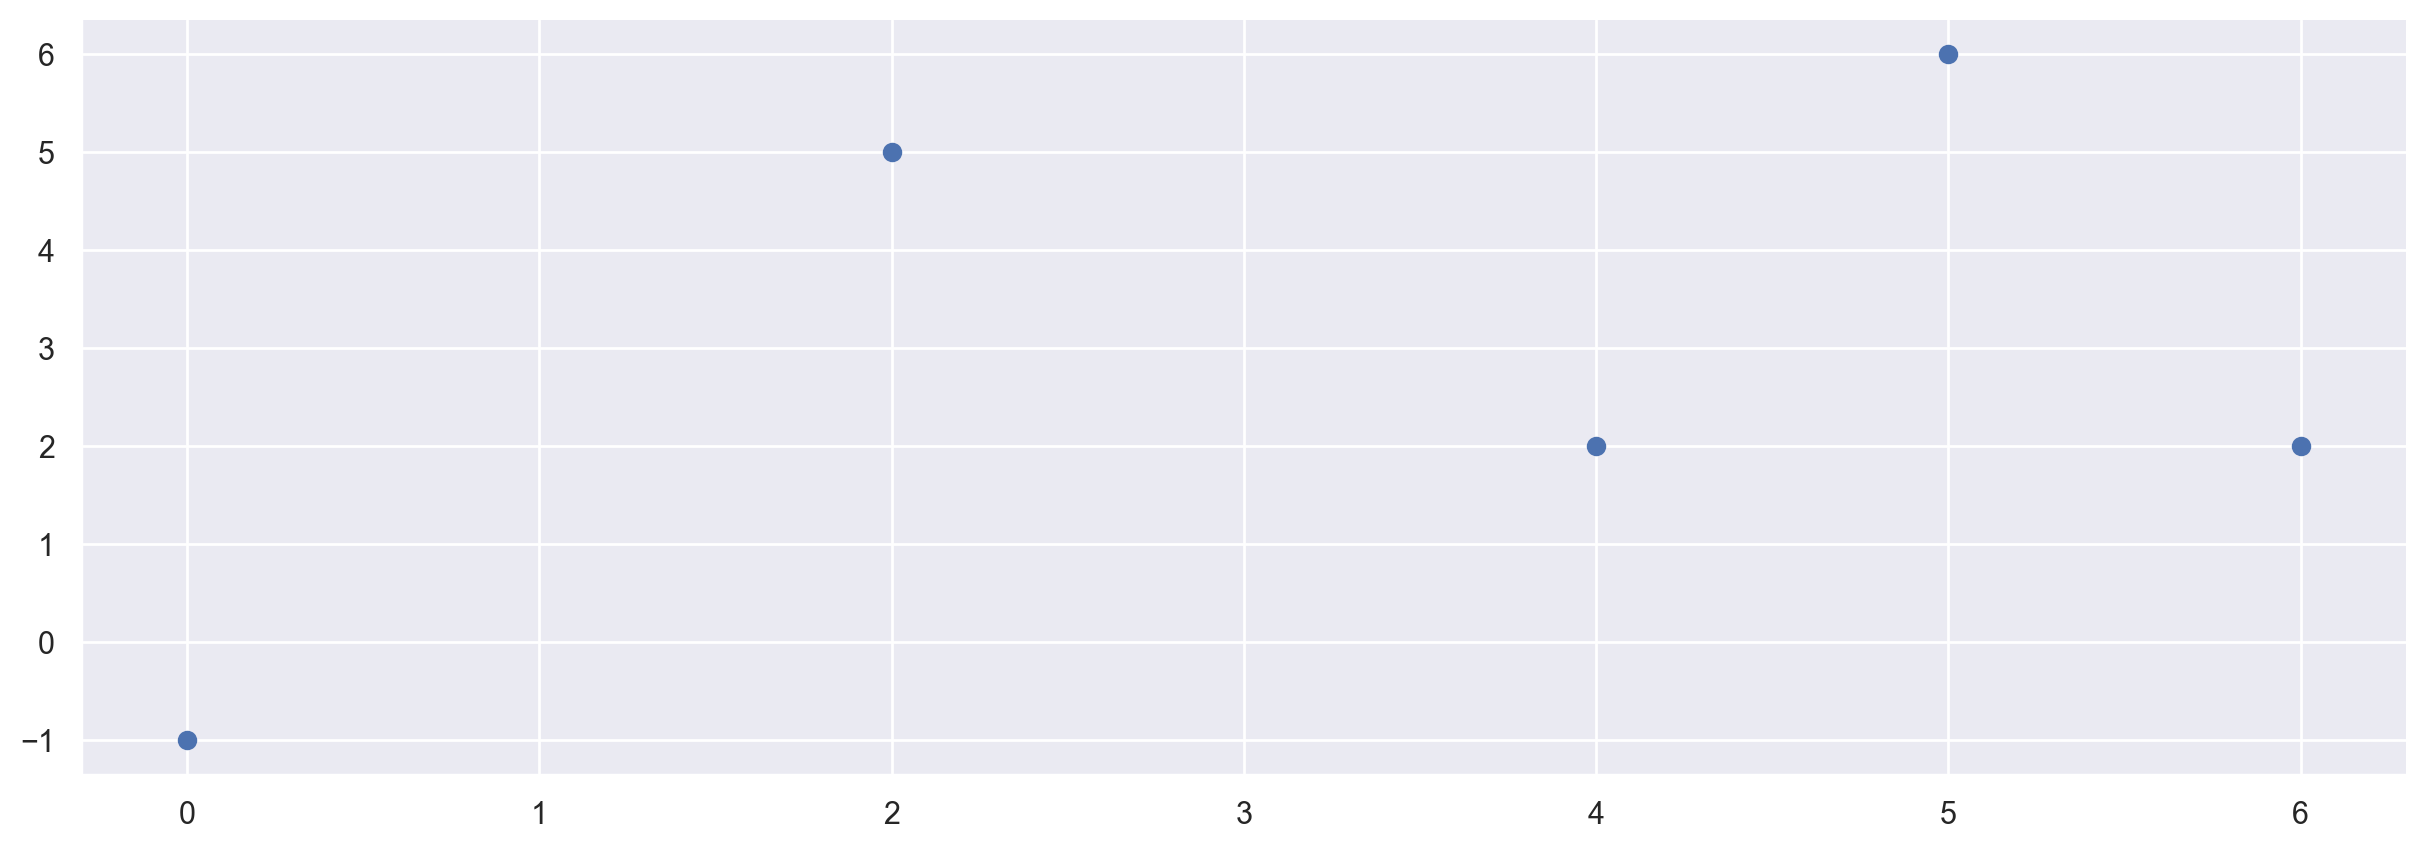

In [3]:
x = [0, 2, 4, 5, 6]
y = [-1, 5, 2, 6, 2]

plt.figure(figsize=(15, 5))
plt.scatter(x, y)
sns.despine()
plt.show()

### Dla funkcji zadanej określonym wzorem

In [4]:
def plot_fn(fn, min_x, max_x, *, label='', title='Plot', color='b', step=.1, ax=plt):
    xs = np.arange(min_x, max_x, step)
    ax.plot(xs, [fn(x) for x in xs], color, label=label)
    if label: ax.legend(loc='best')
    
    if ax is plt:
        ax.title(title)
        ax.xlabel('x')
        ax.ylabel('y')
    else:
        ax.title.set_text(title)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    ax.grid()
    
    sns.despine()

###### Przykład

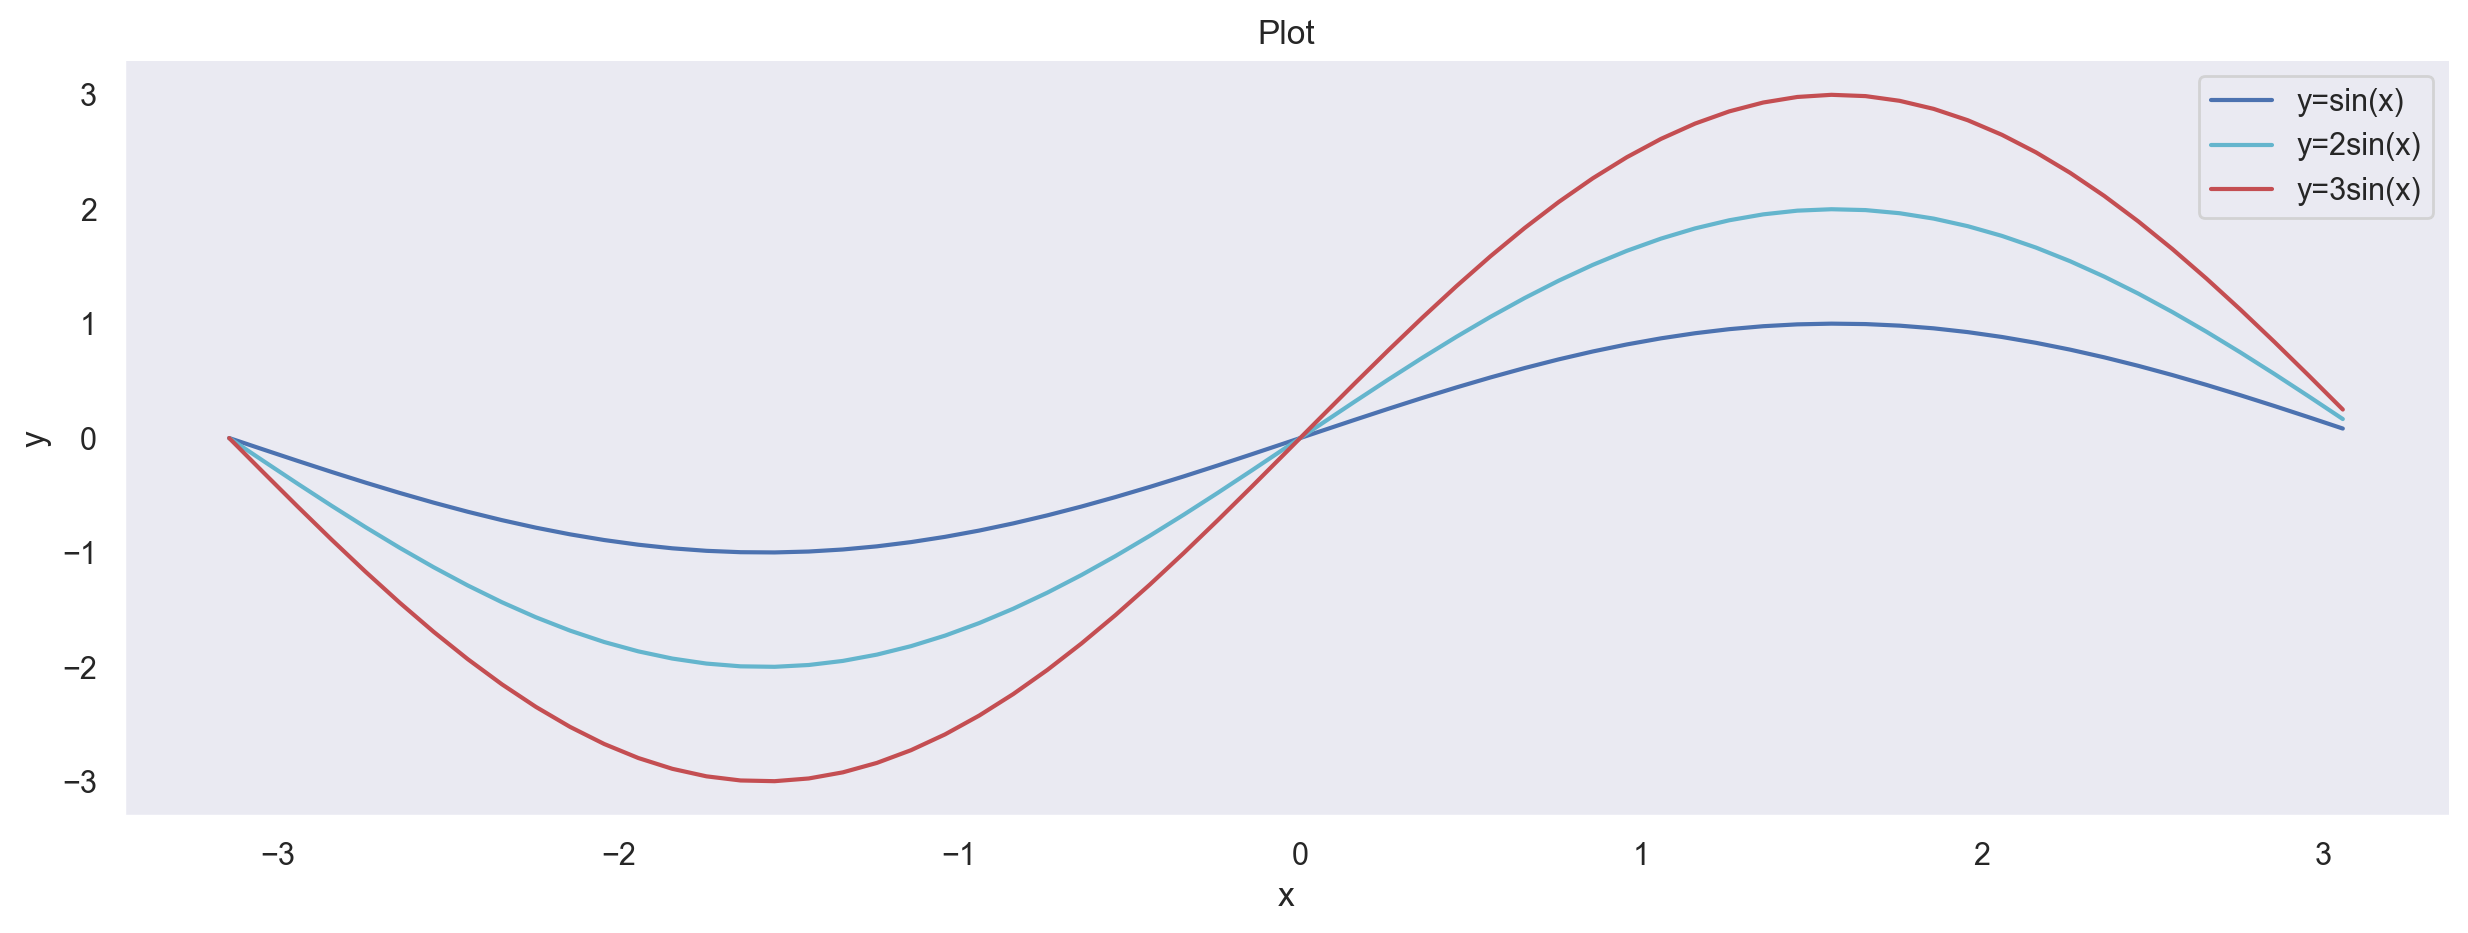

In [5]:
min_x = -np.pi
max_x = np.pi
plt.figure(figsize=(15, 5))
plot_fn(lambda x: np.sin(x), min_x, max_x, color='b', label='y=sin(x)')
plot_fn(lambda x: 2 * np.sin(x), min_x, max_x, color='c', label='y=2sin(x)')
plot_fn(lambda x: 3 * np.sin(x), min_x, max_x, color='r', label='y=3sin(x)')
plt.show()

## Wyznaczanie węzłów zgodnie z zerami wielomianu Czebyszewa

In [6]:
def chebyshev_nodes(a, b, n):
    xs = []
    for k in range(n, 0, -1):
        xs.append(.5 * (a + b) + .5 * (b - a) * math.cos((2 * k - 1) / (2 * n) * math.pi))
    return xs

###### Przykład

In [7]:
chebyshev_nodes(-1, 1, 10)

[-0.9876883405951377,
 -0.8910065241883678,
 -0.7071067811865475,
 -0.45399049973954675,
 -0.15643446504023104,
 0.15643446504023092,
 0.4539904997395468,
 0.7071067811865476,
 0.8910065241883679,
 0.9876883405951378]

## Zagadnienie interpolacji

### Metoda Lagrange'a

#### Wzór na wielomian interpolacyjny $n$. stopnia

Dla $k\in\{0,1,...,n\}$

**Licznik $d$:**

$d=(x-x_0)(x-x_1)...(x-x_{k-1})\downarrow(x-x_{k+1})...(x-x_n)$

**Mianownik $m$:**

$m=(x_k-x_0)(x_k-x_1)...(x_k-x_{k-1})\downarrow(x_k-x_{k+1})...(x_k-x_n)$

(pomijamy w liczniku i mianowniku te czynniki, w których odejmowalibyśmy $x_k$ (oznaczone przez $\downarrow$))

**Baza Lagrange'a**

$L_k(x)=\frac{d}{m}=\prod\limits_{i=0,i\neq{k}}^{n}=\Large{\frac{x-x_i}{x_k-x_i}}$

Stąd możemy już wyznaczyć wielomian interpolacyjny $n$. stopnia jako sumę iloczynów współczynników (znanych wartości interpolowanej funkcji) oraz wartości z Bazy Lagrange'a, obliczonych przy pomocy powyższego wzoru dla danego $x$, dla którego liczymy wartość wielomianu interpolującego $P_n$:

**Wielomian interpolacyjny Lagrange'a**

$P_n(x)=\sum\limits_{k=0}^{n}f(x_k)L_k(x)$

#### Algorytm wyznaczający wielomian interpolujący

In [8]:
def lagrange(xs, ys):
    if len(xs) != len(ys):
        raise ValueError('A list of x values has different size than a list of y values')

    ms = []
    
    for xk in xs:
        m = 1
        for xi in xs:
            if xi != xk:
                m *= (xk - xi)
        ms.append(m)
    
    def f(x):
        y = 0
        
        for k, yk in enumerate(ys):
            d = 1
            for i, xi in enumerate(xs):
                if i == k: continue
                d *= (x - xi)
                
            y += d * yk / ms[k]
        
        return y
            
    return f

### Metoda Newtona (ilorazów różnicowych)

#### Dla dowolnie rozdystrybuowanych punktów

##### Wzór na wielomian interpolacyjny $n$. stopnia

Przyjmijmy następujące oznaczenia:

$0$. iloraz różnicowy względem $x_i$: $f[x_i]=f(x_i)$

$1$. iloraz różnicowy względem $x_i$ oraz $x_{i+1}$: $f[x_i,x_{i+1}]=\Large{\frac{f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i}}$

$k$. iloraz różnicowy względem $x_i,x_{i+1},...,x_{i+k}$: $f[x_i,x_{i+1},...,x_{i+k}]=\Large{\frac{f[x_{i+1},x_{i+2},...,x_{i+k}]-f[x_i,x_{i+1},...,x_{i+k-1}]}{x_{i+k}-x_i}}$

**Wielomian interpolacyjny Newtona**

$P_n(x)=f[x_0]+(x-x_0)f[x_0,x_1]+(x-x_0)(x-x_1)f[x_0,x_1,x_2]+...+(x-x_0)(x-x_1)...(x-x_{n-1})f[x_0,x_1,...,x_n]$

Po przekształceniu:

$P_n(x)=f[x_0]+\sum\limits_{k=1}^{n}f[x_0,x_1,...,x_k](x-x_0)...(x-x_{k-1})$

##### Algorytm wyznaczający wielomian interpolujący dla dowolnego rozkładu węzłów

In [9]:
def newton(xs, ys):
    if len(xs) != len(ys):
        raise ValueError('A list of x values has different size than a list of y values')
        
    n = len(xs)
    bs = list(ys)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            bs[i] = (bs[i] - bs[i - 1]) / (xs[i] - xs[i - j])
            
    def f(x):
        x_diffs = [1] + [x - xs[i] for i in range(n - 1)]
        
        y = 0
        x_coeff = 1
        for bi, x_diff in zip(bs, x_diffs):
            x_coeff *= x_diff
            y += bi * x_coeff
            
        return y
            
    return f

#### Dla punktów równomiernie rozłożonych

##### Wzór na wielomian interpolacyjny $n$. stopnia

Położenie każdego z otrzymywanych na wejściu punktów, możemy opisać następująco:

$x_{i+1}=x_0+i\cdot{h}$, gdzie $i\in\{0,1,...,n-1\}$

**Różnica progresywna**

Różnica progresywna pomiędzy $i$. oraz $i+1$. wartością $y$:

$\Delta^{(0)}y_i:=y_i$
$\Delta^{(k)}y_i:=\Delta^{(k-1)}y_{i+1}-\Delta^{(k-1)}y_{i}$, gdzie $k\ge{1}$

**Iloraz różnicowy dla węzłów równoodległych**

$f[x_0,x_1,...,x_k]=\frac{1}{k!h^k}\Delta^kf(x_0)$

**Wielomian interpolacyjny Newtona dla węzłów rownoodległych**

$P_n(x)=P_n(x_0+s\cdot{h})=\sum\limits_{k=0}^{n}\binom{s}{k}\Delta^kf(x_0)$

##### Algorytm wyznaczający wielomian interpolujący dla węzłów równomiernie rozdystrybuowanych

In [10]:
def memoized(fn):
    cache = {}

    def inner(arg):
        if arg not in cache:
            cache[arg] = fn(arg)
        return cache[arg]
        
    return inner


@memoized
def factorial(n):
    if n in {0, 1}: return 1
    return n * factorial(n - 1)


def _choose_int(n: int, k: int) -> float:
    if k > n: return 0
    if n == k: return 1
    m = factorial(n)
    d = factorial(k) * factorial(n - k)
    return m / d


def _choose_float(n: float, k: int) -> float:
    d = 1
    for i in range(k):
        d *= (n - i)
    return d / factorial(k)

    
def choose(n, k):
    mul = 1
    m = n
    
    if n < 0:
        mul = (-1) ** k
        m = k - n - 1
        
    if n == int(n) and k == int(k):
        return mul * _choose_int(m, k)
    return mul * _choose_float(m, k)


def eqdist_newton(x_0, h, n, ys):
    if n != len(ys):
        raise ValueError('A number of x values is different than a length of a list of y values')
        
    Δ = list(ys)
    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            Δ[i] = Δ[i] - Δ[i - 1]
            
    def f(x):
        s = (x - x_0) / h
        
        y = 0
        for k in range(0, n):
            y += choose(s, k) * Δ[k]
        return y
            
    return f

# Zadania

## Interpolowana funkcja

### Wzór funkcji

$\Large{f(x)=e^{-k\cdot{sin(mx)}}+k\cdot{sin(mx)}-1}$

gdzie $k=2$, $m=2$, $x\in[-\pi,2\pi]$

In [11]:
f = lambda x, k, m: math.e ** (-k * math.sin(m * x)) + k * math.sin(m * x) - 1

In [12]:
k = 2
m = 2
a = -math.pi
b = 2 * math.pi
x = [a, b]

g = lambda x: f(x, k, m)

### Wykres funkcji

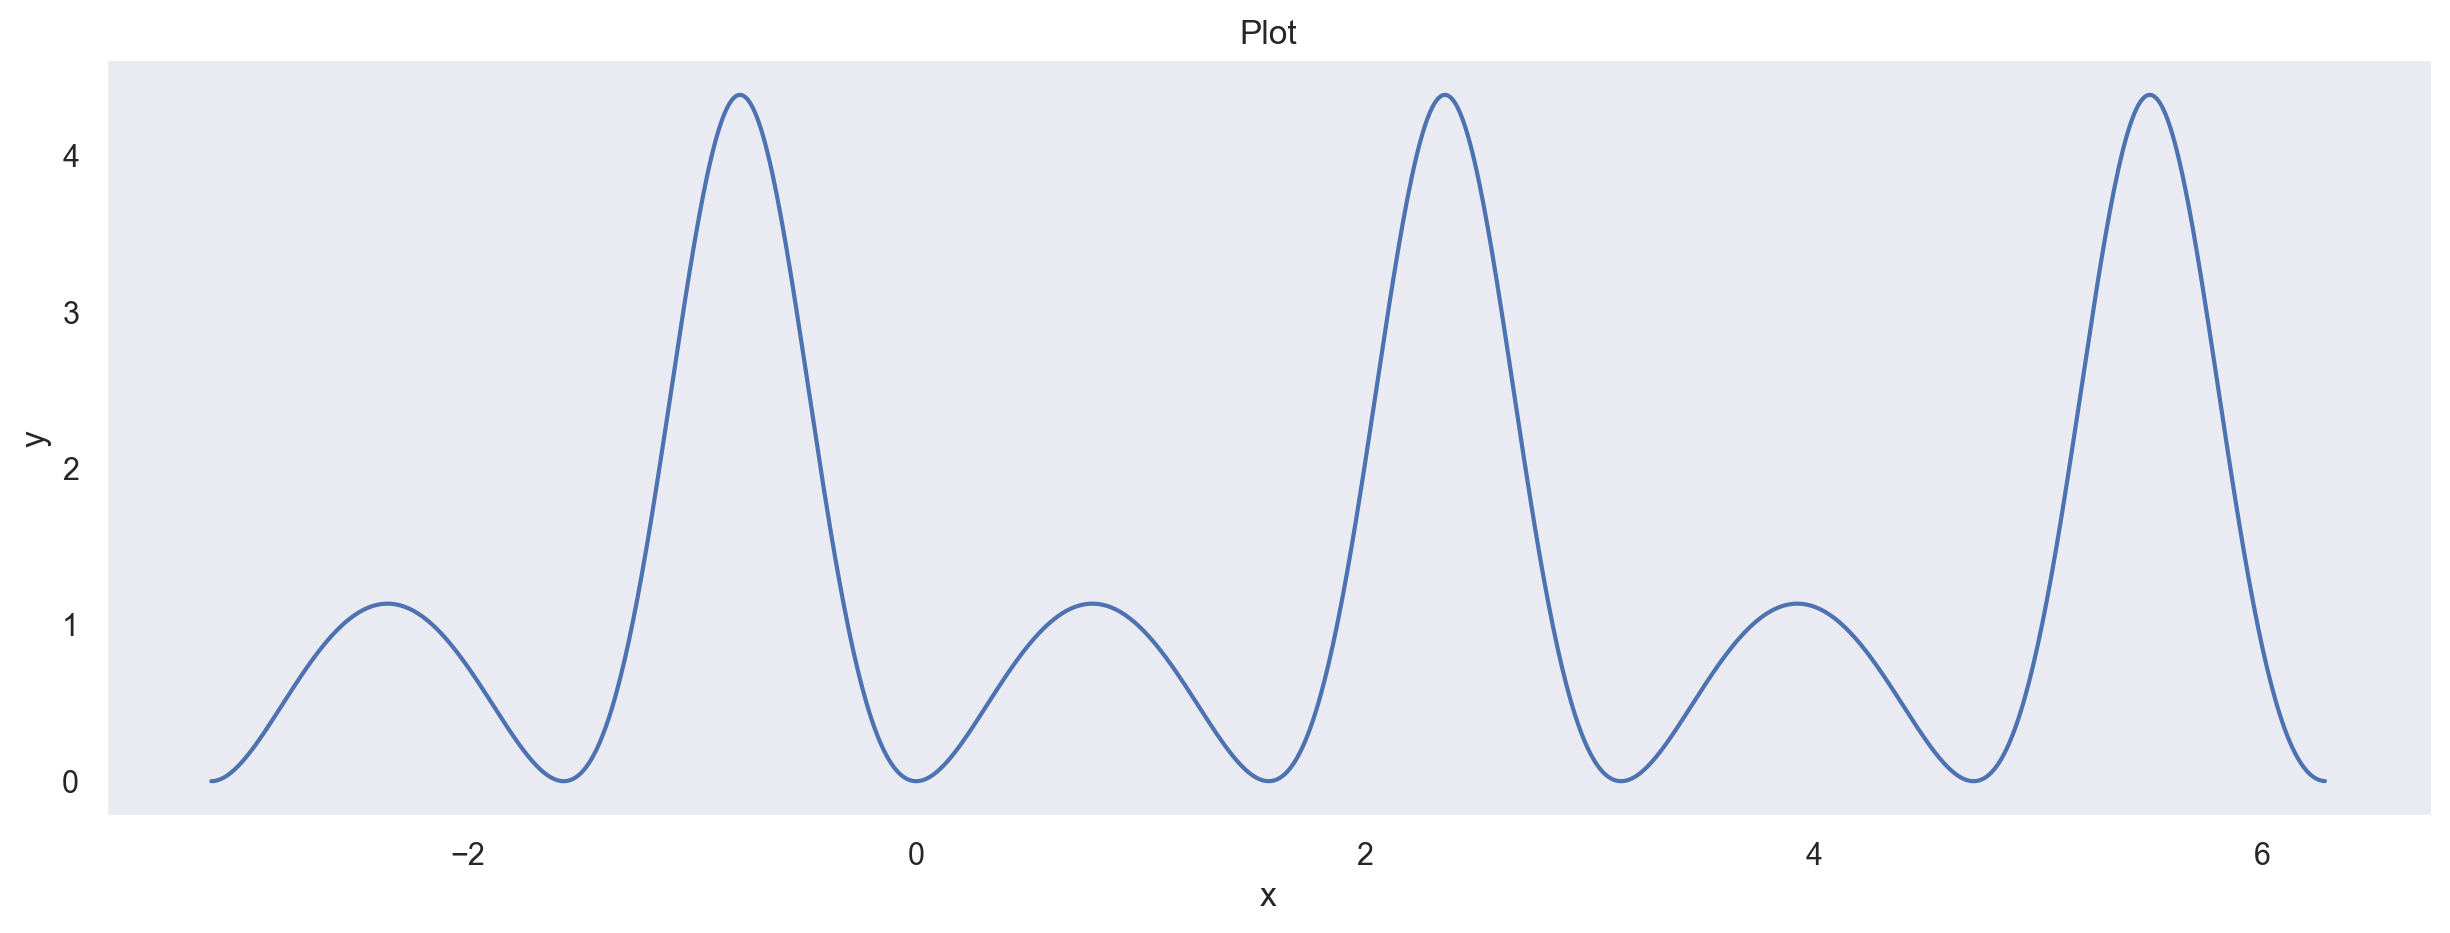

In [13]:
plt.figure(figsize=(15, 5))
plot_fn(g, a, b, step=.01)
plt.show()

## Dokładność przybliżenia funkcji interpolowanej przez wielomian interpolujący 

Przyjmijmy następujące oznaczenia:

$f(x)$ - interpolowana funkcja (funkcja wzorcowa)

$W(x)$ - wielomian interpolujący (przybliżający funkcję wzorcową)

### Norma z różnicy

$||f(x)-W(x)||$

In [14]:
def abs_diff(f, W, xs):
    return [abs(f(x) - W(x)) for x in xs]

### Największa różnica

$max_k\{||f(x_k)-W(x_k)||\}$

In [15]:
def max_diff(f, W, xs):
    return max(abs_diff(f, W, xs))

### Suma kwadratów różnic

$\sum\limits_{i = 1}^{N} (f(x_i) - W(x_i))^2$

In [16]:
def sum_sq_diff(f, W, xs):
    return sum(d ** 2 for d in abs_diff(f, W, xs))

## Interpolacja

### Pomocnicze funkcje

In [64]:
def interpolate(xs, ys, options):
    Ws = []
    labels = []
    
    for o in options:
        match o:
            # Lagrange's interpolation
            case 'l':
                Ws.append(lagrange(xs, ys))
                labels.append('Lagrange\'s')
            # Newton's interpolation
            case 'n':
                Ws.append(newton(xs, ys))
                labels.append('Newton\'s')
            # Newton's interpolation for equally distributed points
            case 'n_eq':
                Ws.append(eqdist_newton(xs[0], xs[1] - xs[0], len(xs), ys))
                labels.append('Newton\'s eq dist')
        
    return Ws, labels

def comparison_plot(ax, f, Ws, a, b, title, colors, labels):
    # Printing function and its interpolations
    plot_fn(f, a, b, step=.01, color='#777', label='f', ax=ax)
    for W, label, c in zip(Ws, labels, colors):        
        plot_fn(W, a, b, step=.01, color=c, label=label, title=title, ax=ax)
        
def errors_plot(ax, f, Ws, a, b, N, title, colors):
    xs = np.linspace(a, b, N)
    for W, c in zip(Ws, colors):
        ys = abs_diff(f, W, xs)
        ax.scatter(xs, ys, c=c, s=2)
        ax.set_title(title)
        
def interpolation_error(f, Ws, a, b, N, labels):
    xs = np.linspace(a, b, N)
    label_just = max(len(label) for label in labels) + 14
    
    for W, label in zip(Ws, labels):
        diffs = abs_diff(f, W, xs)
        print(tabulate([
                ('Max abs difference        ', max(diffs)),
                ('Sum of differences squares', sum(x ** 2 for x in diffs))
            ], [
                f'{label} interpolation'.ljust(label_just)
            ], tablefmt='pretty', floatfmt='.6f')
        )

def compare_interpolation(f, a, b, n, *, options=('l', 'n', 'n_eq'), N=1000):
    if n < 2: raise ValueError('n should be greater than 1')
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))
    plt.subplots_adjust(hspace=.3)
    
    # Equal nodes distribution
    xs = np.linspace(a, b, n)
    ys = np.array([f(x) for x in xs])
    # Interpolating polynomials
    Ws, labels = interpolate(xs, ys) if not options else interpolate(xs, ys, options=options)
    # Draw a comparison plot
    comparison_plot(ax[0, 0], f, Ws, a, b, 'Equal distribution', 'rgb', labels)
    errors_plot(ax[0, 1], f, Ws, a, b, N, 'Equal distribution error', 'rgb')
    ax[0, 0].scatter(xs, ys, c='black')
    print('Equal distribution')
    interpolation_error(f, Ws, a, b, N, labels)
    
    if options: options = filter(lambda o: o != 'n_eq', options)
    # Chebyshev nodes distribution
    xs = chebyshev_nodes(a, b, n)
    ys = np.array([f(x) for x in xs])
    # Interpolating polynomials
    Ws, labels = interpolate(xs, ys) if not options else interpolate(xs, ys, options=options)
    # Draw a comparison plot
    comparison_plot(ax[1, 0], f, Ws, a, b, 'Chebyshev distribution', 'rgb', labels)
    errors_plot(ax[1, 1], f, Ws, a, b, N, 'Chebyshev distribution error', 'rgb')
    ax[1, 0].scatter(xs, ys, c='black')
    print('\nChebyshev distribution')
    interpolation_error(f, Ws, a, b, N, labels)
    
    plt.show()

### Interpolacja dla różnej liczby węzłów

###### Dla $n=3$

Dla $n=3$, w przypadku równomiernego rozkładu węzłów, interpolowana funkcja na przedziale $[-\pi, 2\pi]$ przyjmuje zawsze wartość równą $0$ w punktach, będących węzłami interpolacji. Podobne rezultaty otrzymamy więc również dla $n\in\{4, 7\}$

Equal distribution
+----------------------------+--------------------------------+
|                            | Lagrange's interpolation       |
+----------------------------+--------------------------------+
|     Max abs difference     |       4.388913937562246        |
| Sum of differences squares |       3376.8237249859662       |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's interpolation         |
+----------------------------+--------------------------------+
|     Max abs difference     |       4.388913937562246        |
| Sum of differences squares |       3376.8237249859662       |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's eq dist interpolation |
+----------------------------+--------------------------------+
|     Max abs differe

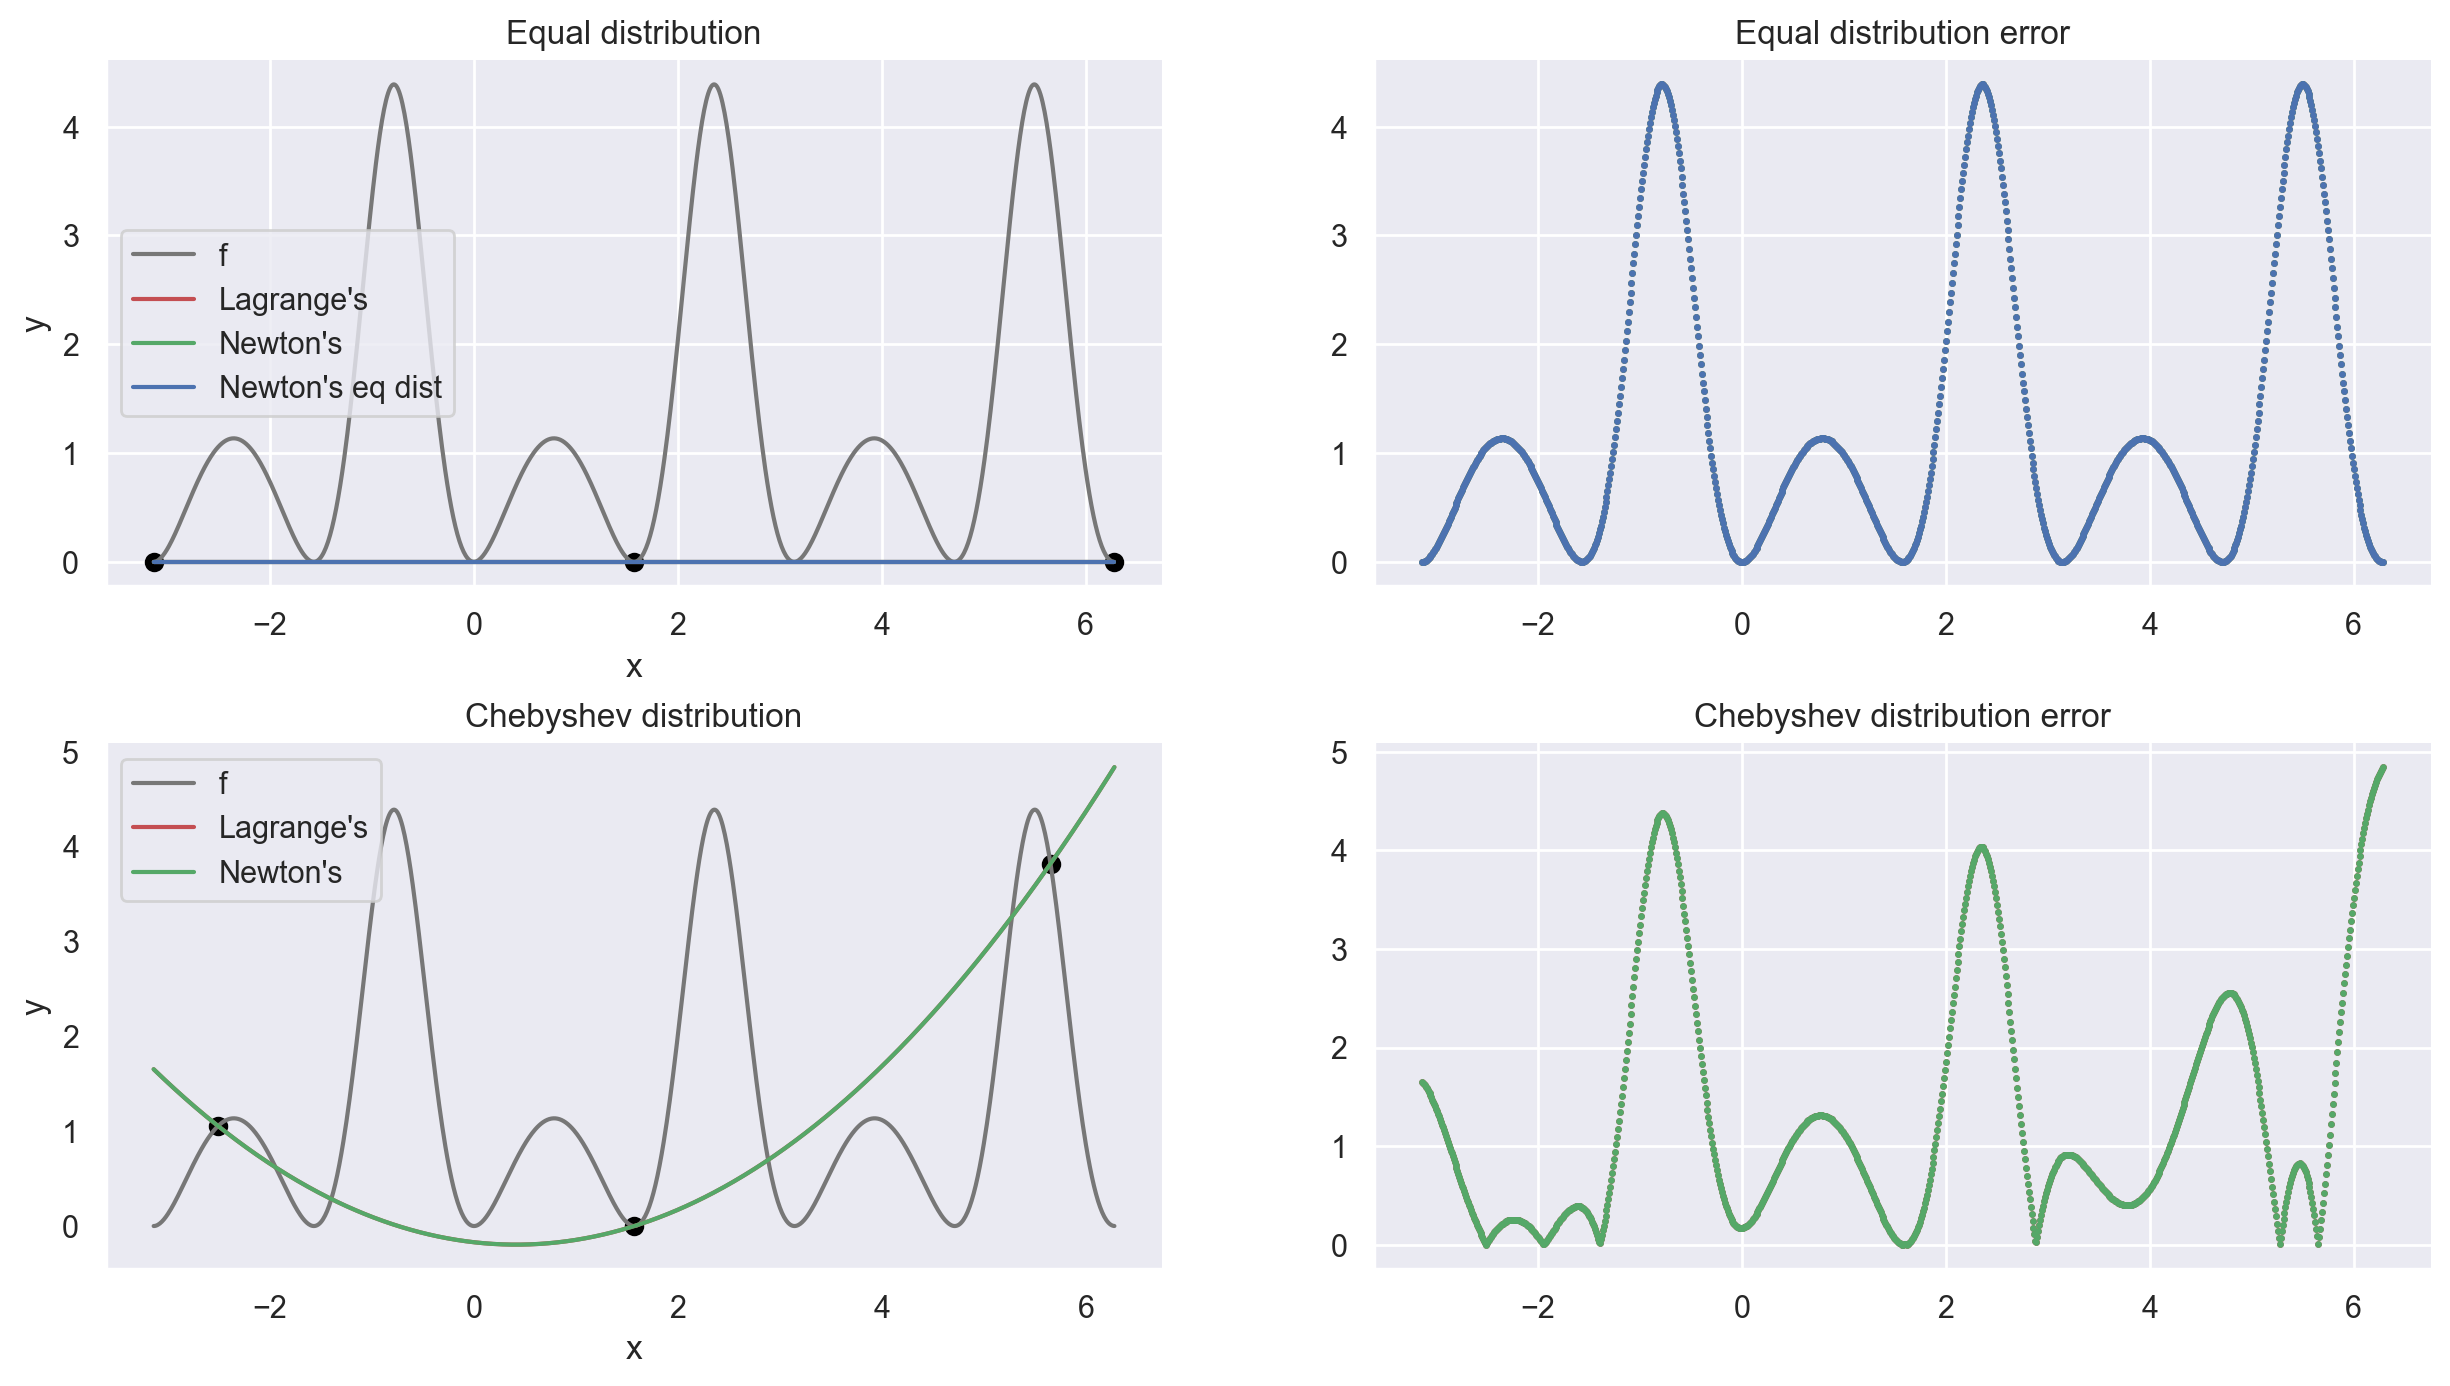

In [66]:
compare_interpolation(g, a, b, 3)

###### Dla $n=7$

Dla $n=7$ ponownie wszystkie węzły trafiają na punkty, dla których wartość interpolowanej funkcji wynosi 1.

Equal distribution
+----------------------------+--------------------------------+
|                            | Lagrange's interpolation       |
+----------------------------+--------------------------------+
|     Max abs difference     |       4.388913937562246        |
| Sum of differences squares |       3376.8237249859662       |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's interpolation         |
+----------------------------+--------------------------------+
|     Max abs difference     |       4.388913937562246        |
| Sum of differences squares |       3376.8237249859662       |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's eq dist interpolation |
+----------------------------+--------------------------------+
|     Max abs differe

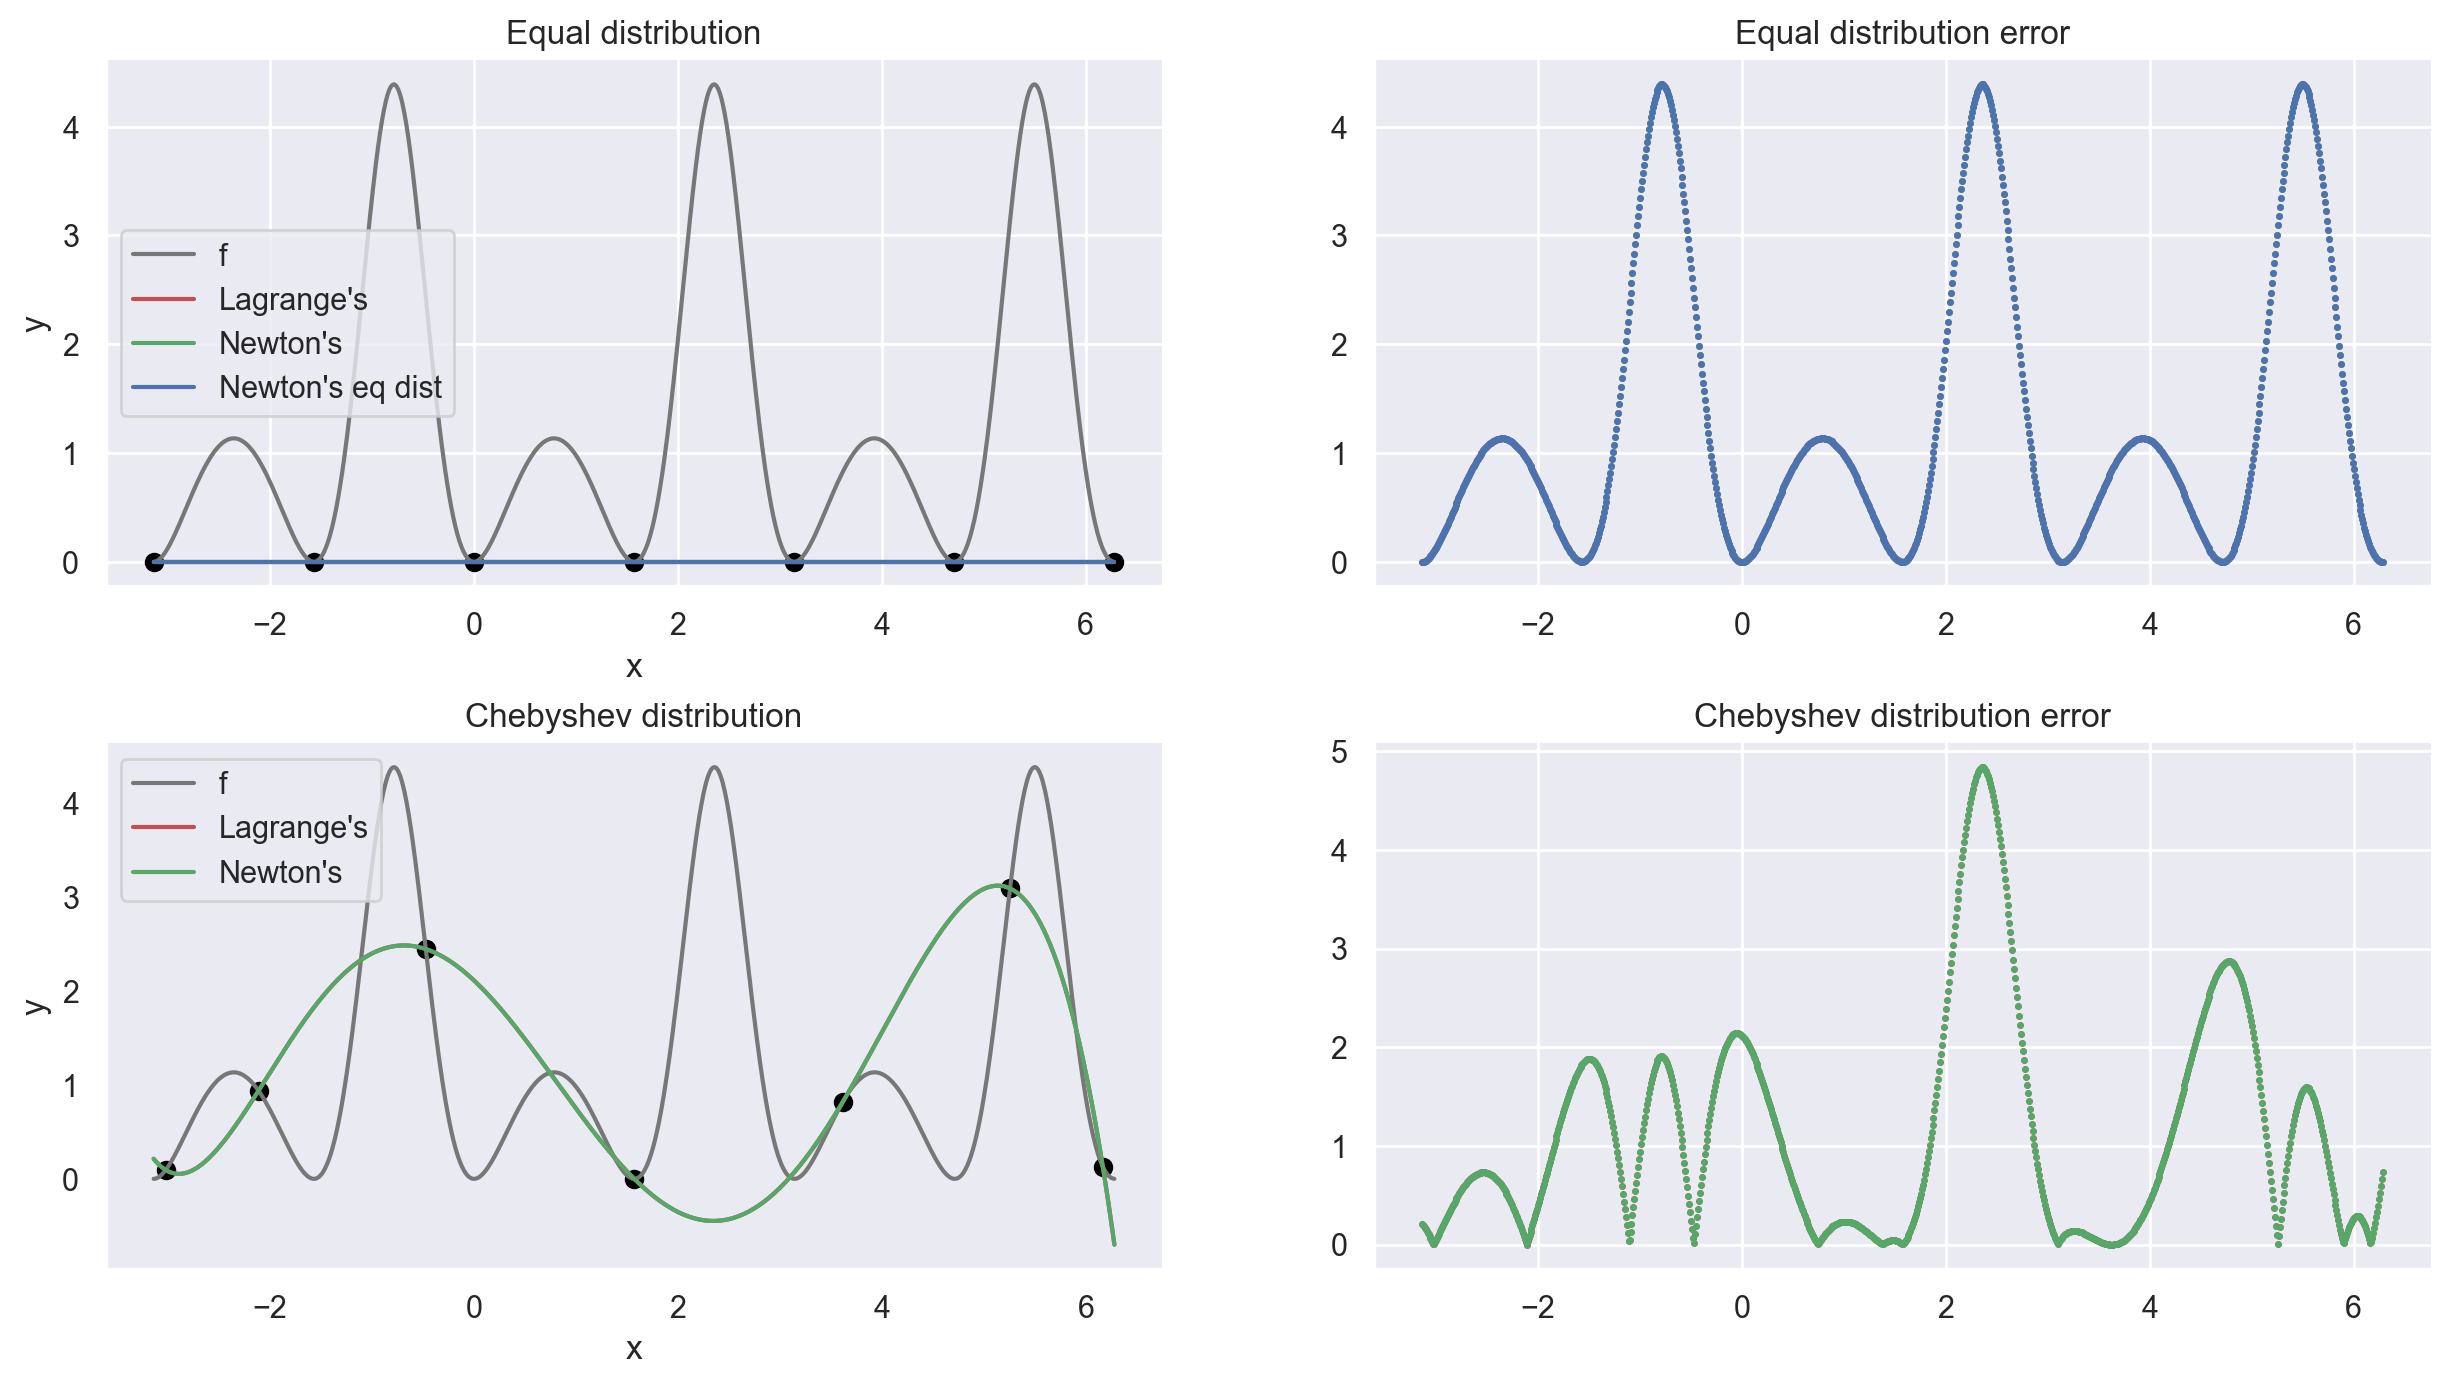

In [67]:
compare_interpolation(g, a, b, 7)

###### Dla $n=11$

Dla $n=11$ po raz pierwszy obserwujemy efekt Runge'go dla równomiernego rozmieszczenia węzłów. W przypadku rozmieszczenia węzłów zgodnie z zerami wielomianu Czebyszewa, nie występuje efekt Runge'go.

Equal distribution
+----------------------------+--------------------------------+
|                            | Lagrange's interpolation       |
+----------------------------+--------------------------------+
|     Max abs difference     |       21.170380597666146       |
| Sum of differences squares |       39901.06694318225        |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's interpolation         |
+----------------------------+--------------------------------+
|     Max abs difference     |       21.170380597665954       |
| Sum of differences squares |       39901.06694318139        |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's eq dist interpolation |
+----------------------------+--------------------------------+
|     Max abs differe

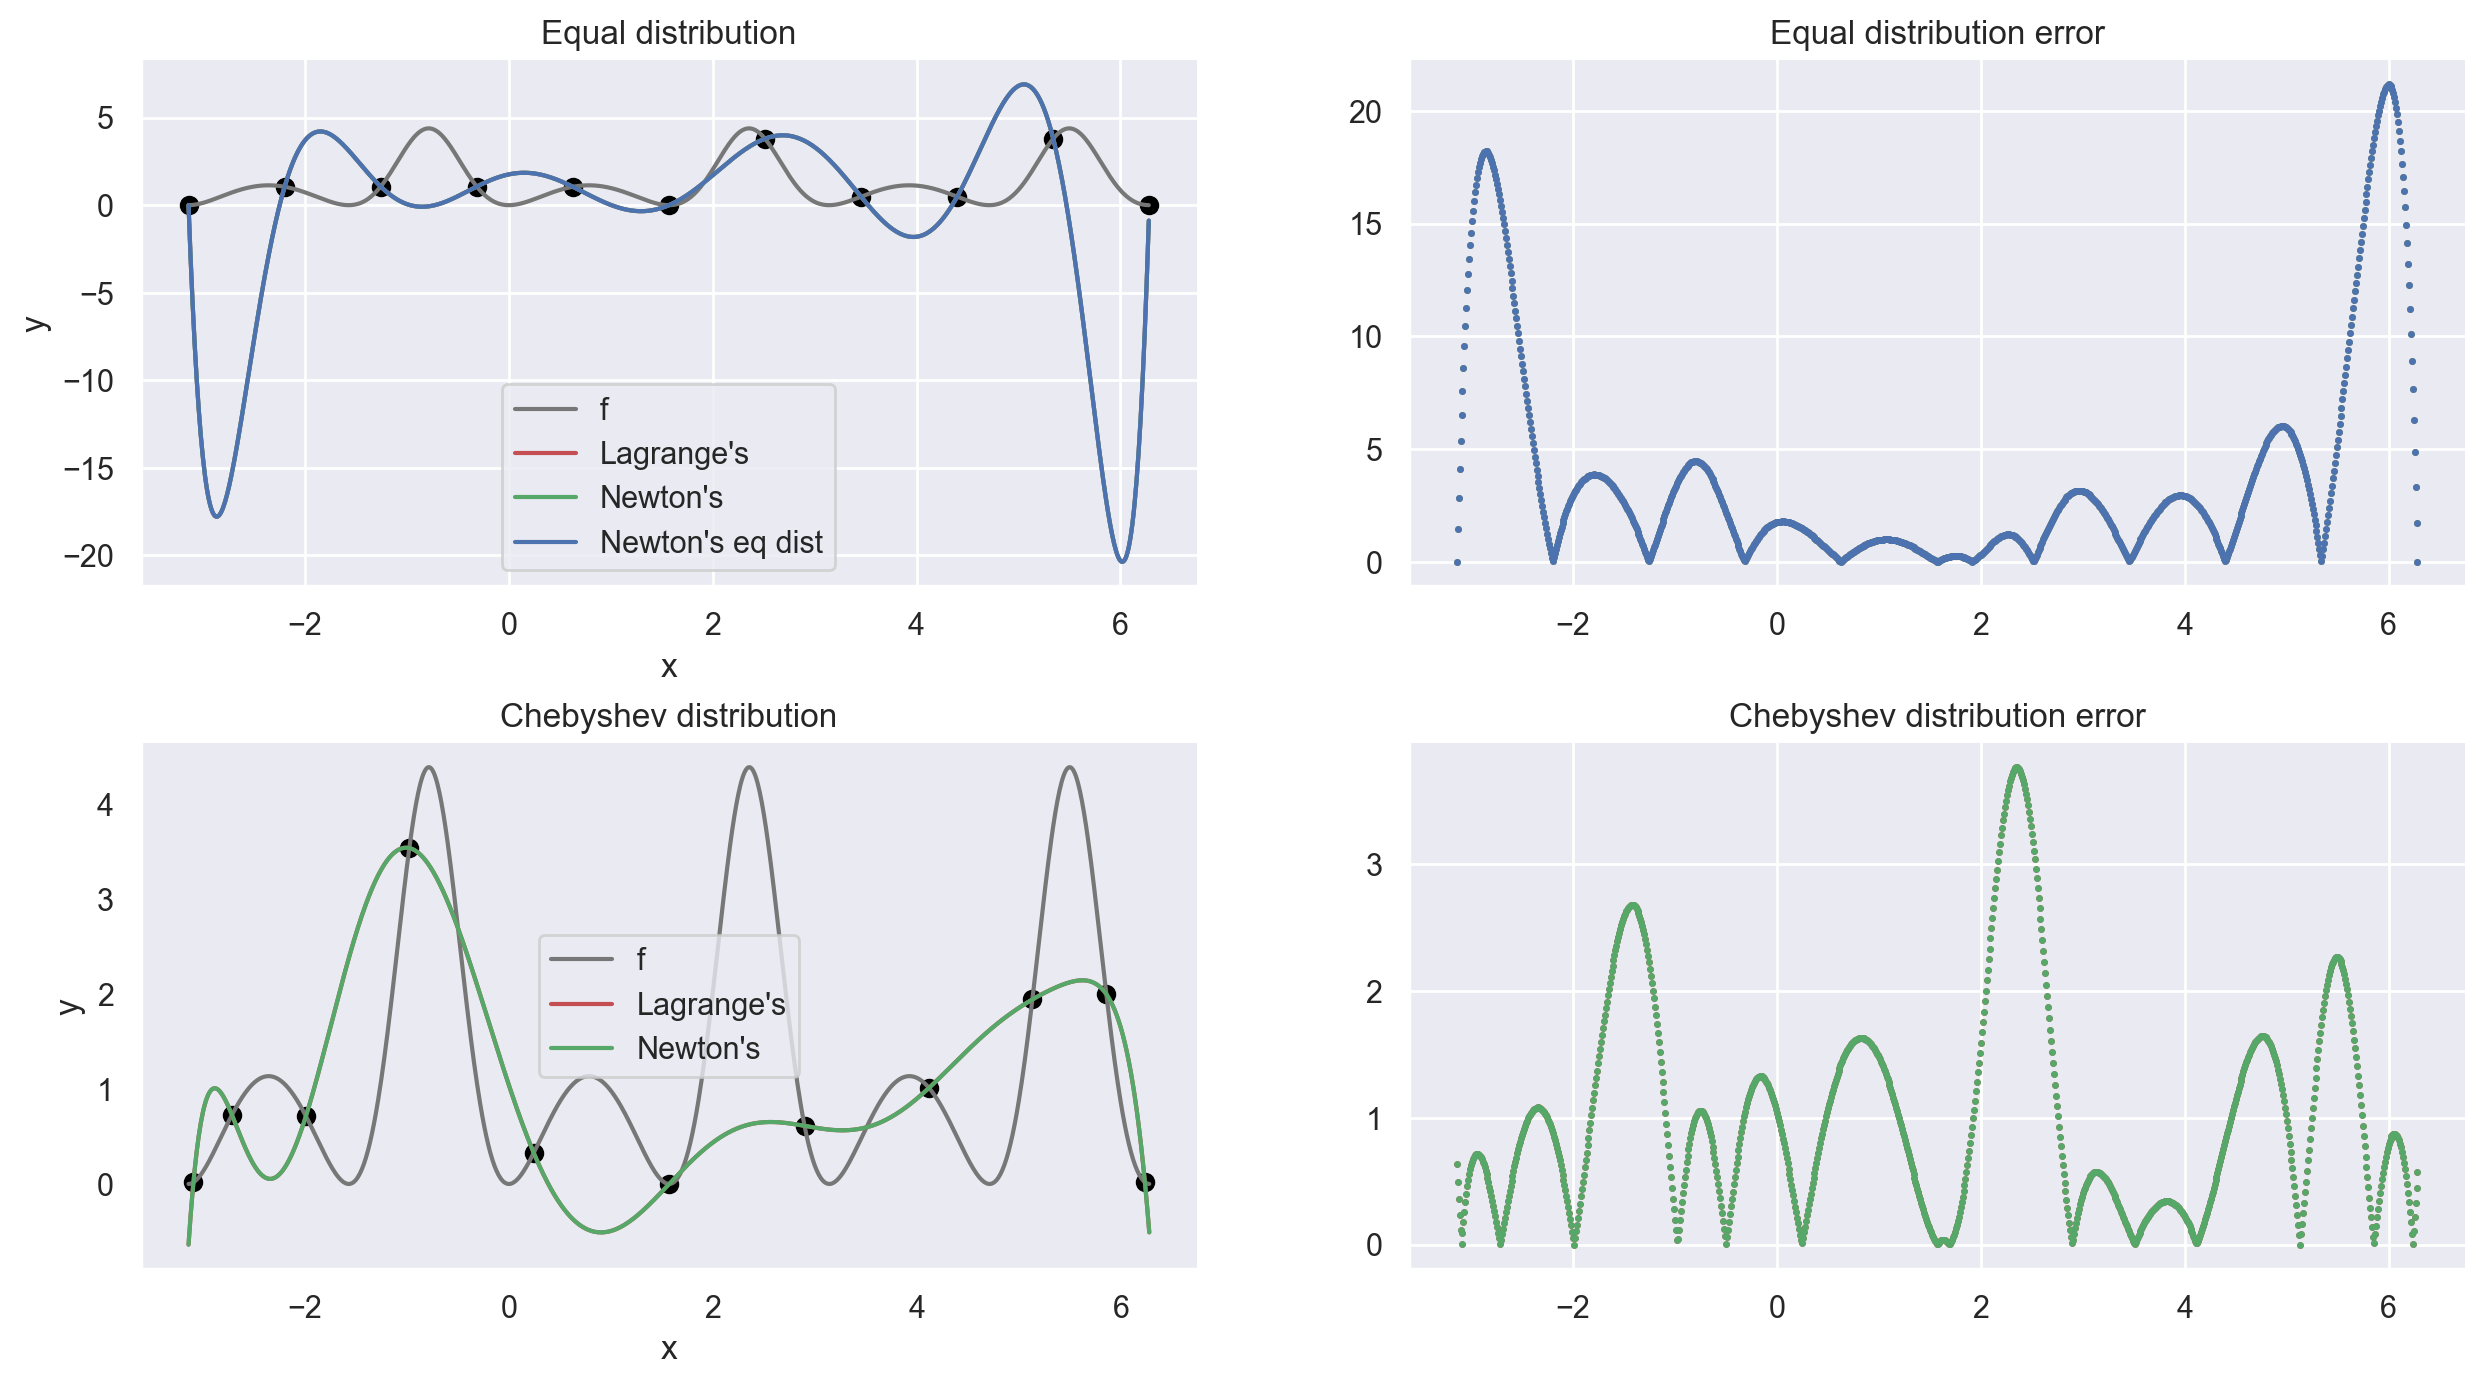

In [68]:
compare_interpolation(g, a, b, 11)

###### Dla $n=20$

Equal distribution
+----------------------------+--------------------------------+
|                            | Lagrange's interpolation       |
+----------------------------+--------------------------------+
|     Max abs difference     |       2500.8780304329584       |
| Sum of differences squares |       230142813.13112825       |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's interpolation         |
+----------------------------+--------------------------------+
|     Max abs difference     |       2500.8780304162783       |
| Sum of differences squares |       230142813.13077456       |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's eq dist interpolation |
+----------------------------+--------------------------------+
|     Max abs differe

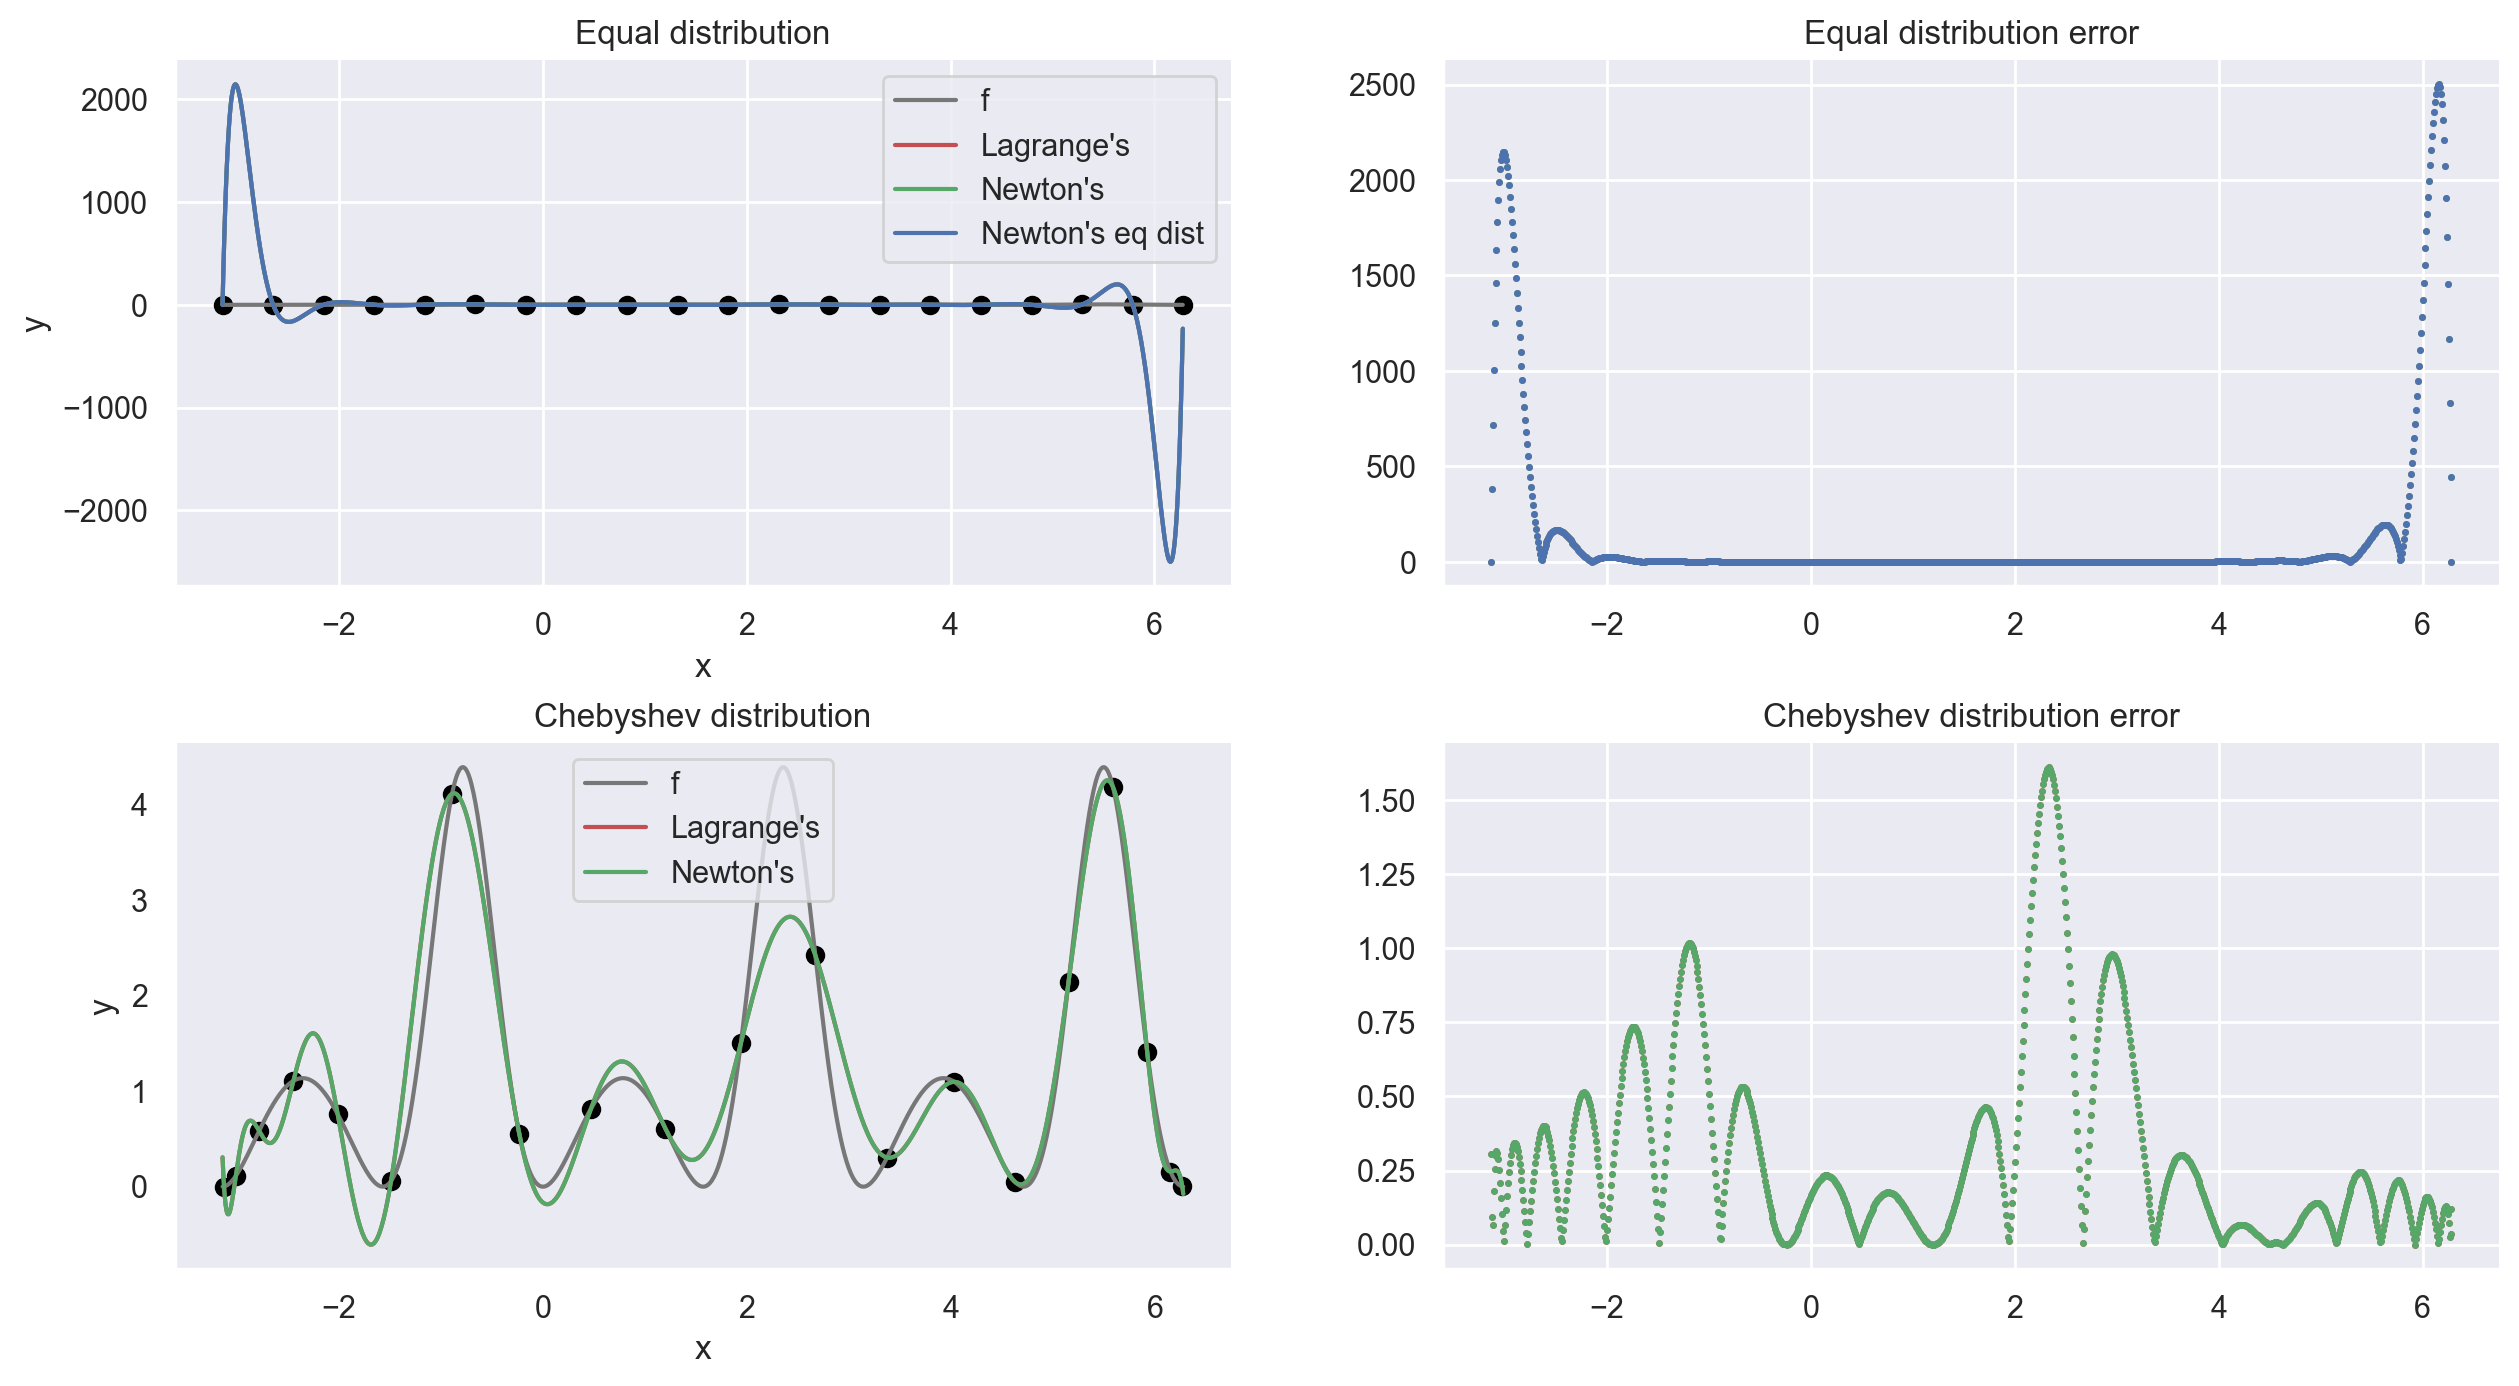

In [69]:
compare_interpolation(g, a, b, 20)

###### Dla $n=40$

Widzimy, że dla $n\ge40$, metoda interpolacji Newtona daje w rezultacie wielomian interpolujący, który gorzej przybliża wyjściową funkcję niż wielomian, otrzymany przy pomocy metody Lagrange'a.

Equal distribution
+----------------------------+--------------------------------+
|                            | Lagrange's interpolation       |
+----------------------------+--------------------------------+
|     Max abs difference     |       2847234.0385765135       |
| Sum of differences squares |       94408824274863.97        |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's interpolation         |
+----------------------------+--------------------------------+
|     Max abs difference     |       2847234.038576016        |
| Sum of differences squares |       94408824938581.66        |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's eq dist interpolation |
+----------------------------+--------------------------------+
|     Max abs differe

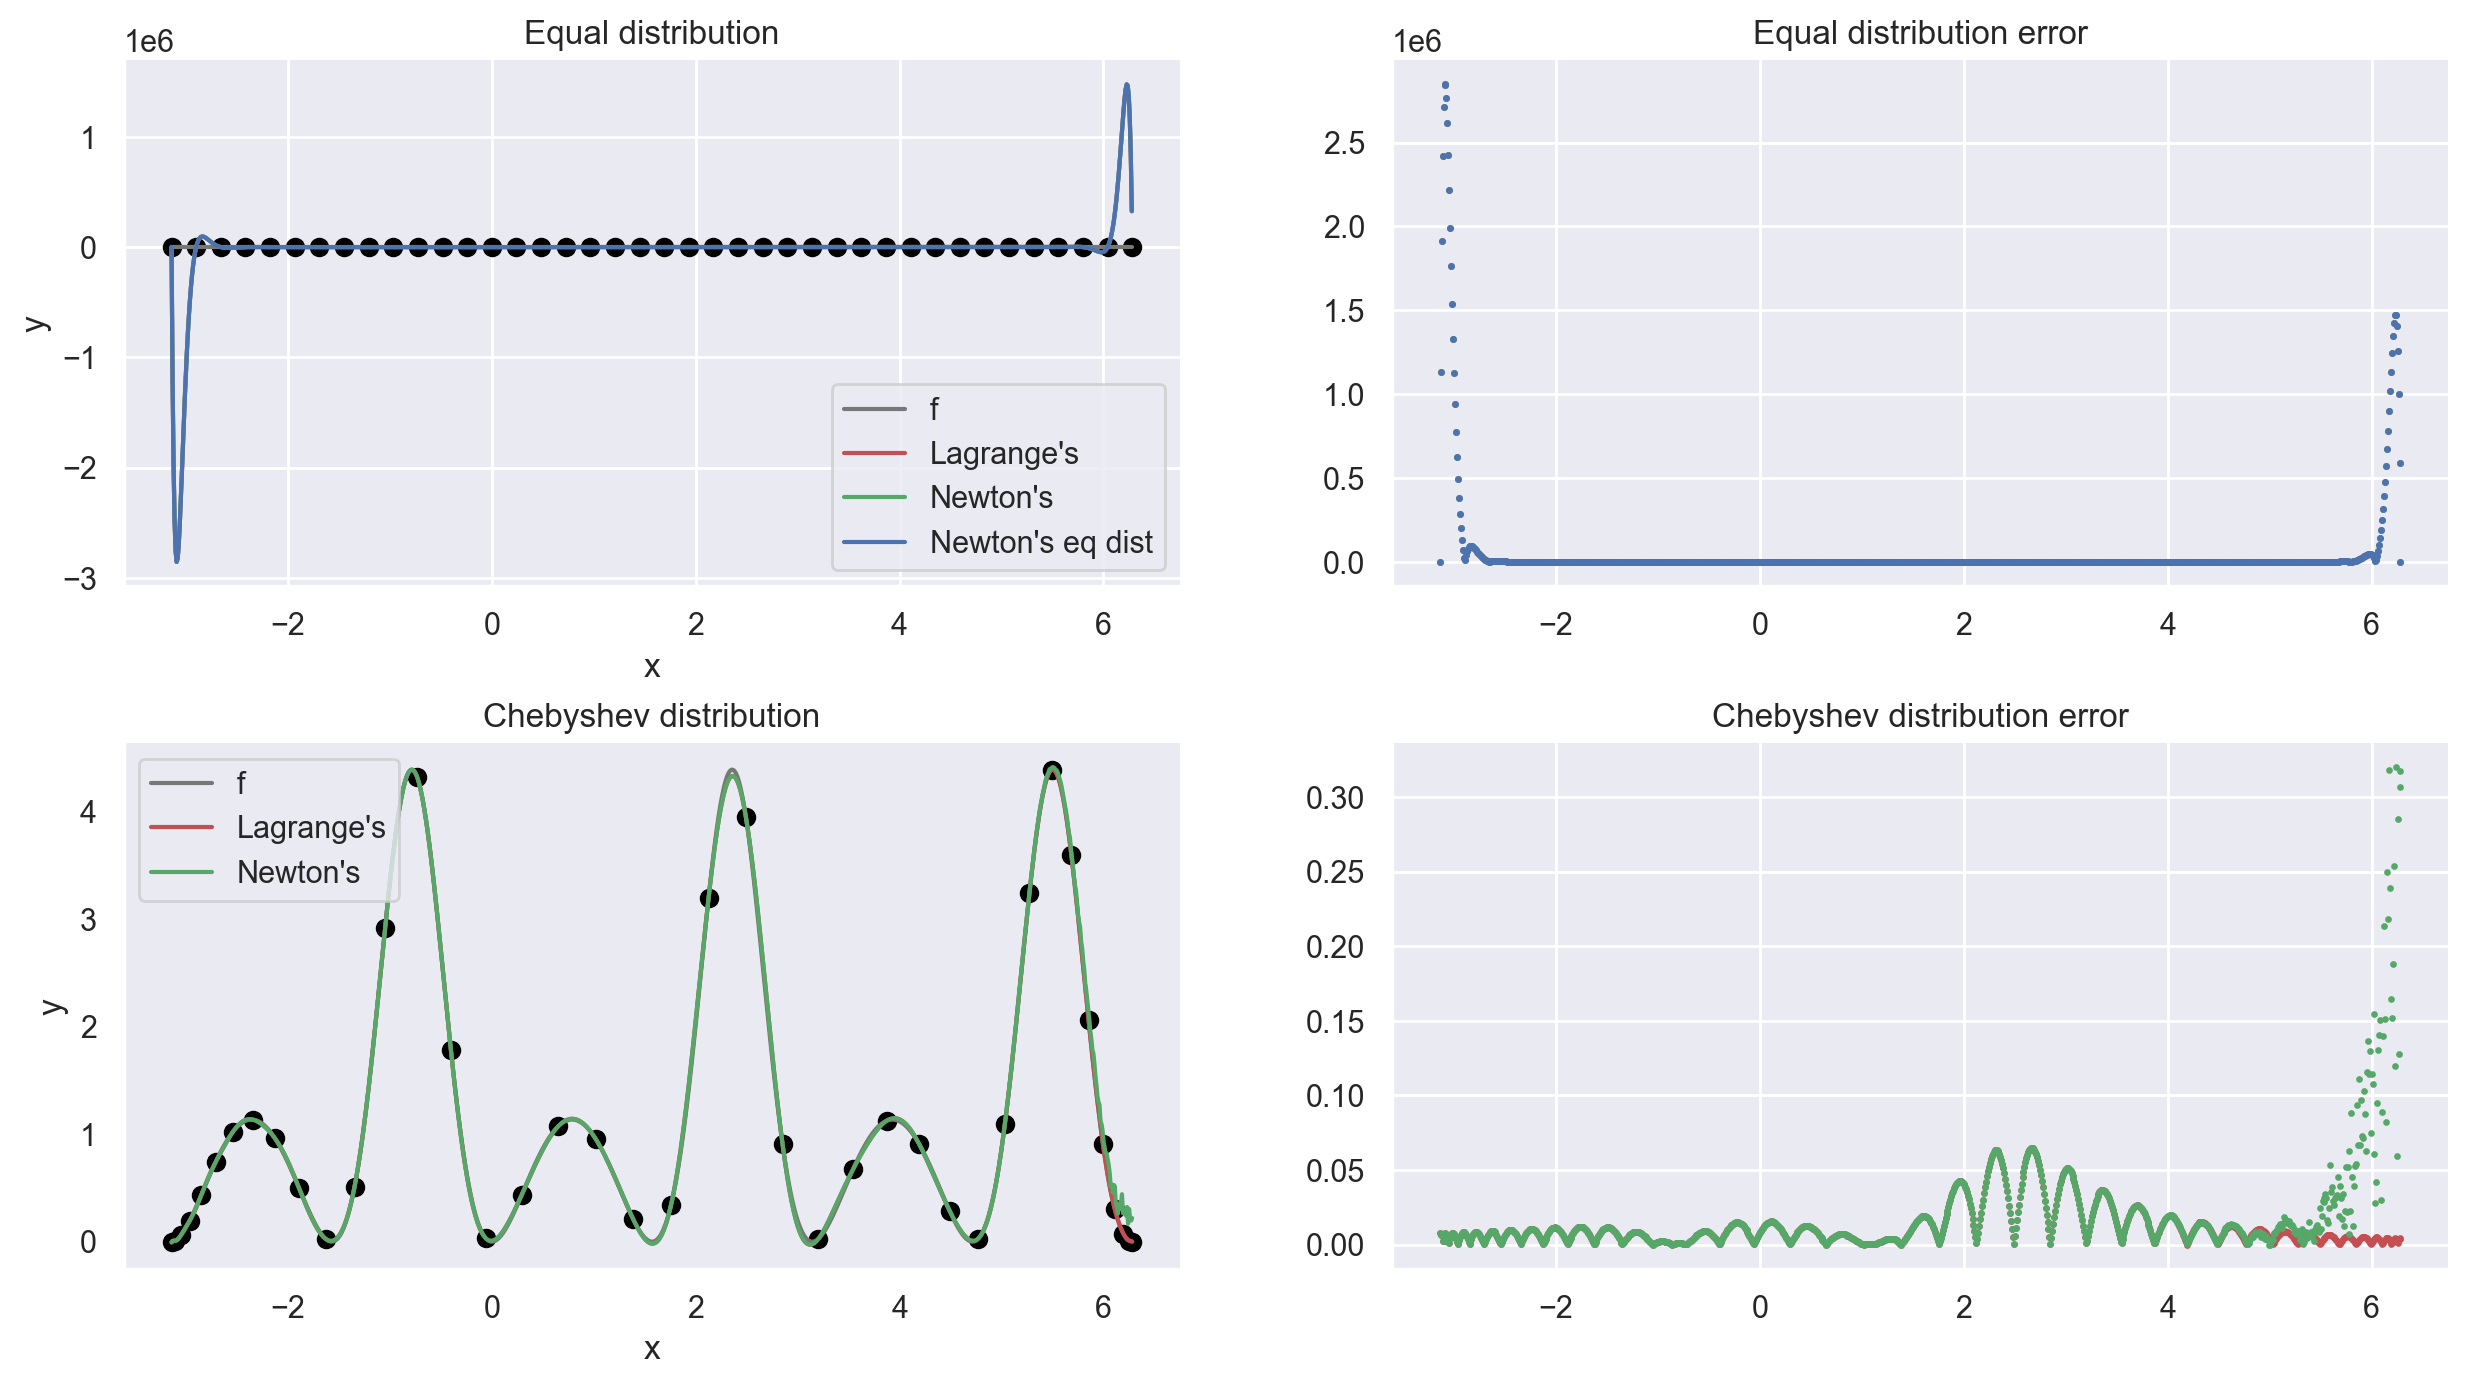

In [70]:
compare_interpolation(g, a, b, 40)

###### Dla $n=50$

Equal distribution
+----------------------------+--------------------------------+
|                            | Lagrange's interpolation       |
+----------------------------+--------------------------------+
|     Max abs difference     |       245756535.42967486       |
| Sum of differences squares |     6.943749259164808e+17      |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's interpolation         |
+----------------------------+--------------------------------+
|     Max abs difference     |       245756074.50677302       |
| Sum of differences squares |     6.943743075875727e+17      |
+----------------------------+--------------------------------+
+----------------------------+--------------------------------+
|                            | Newton's eq dist interpolation |
+----------------------------+--------------------------------+
|     Max abs differe

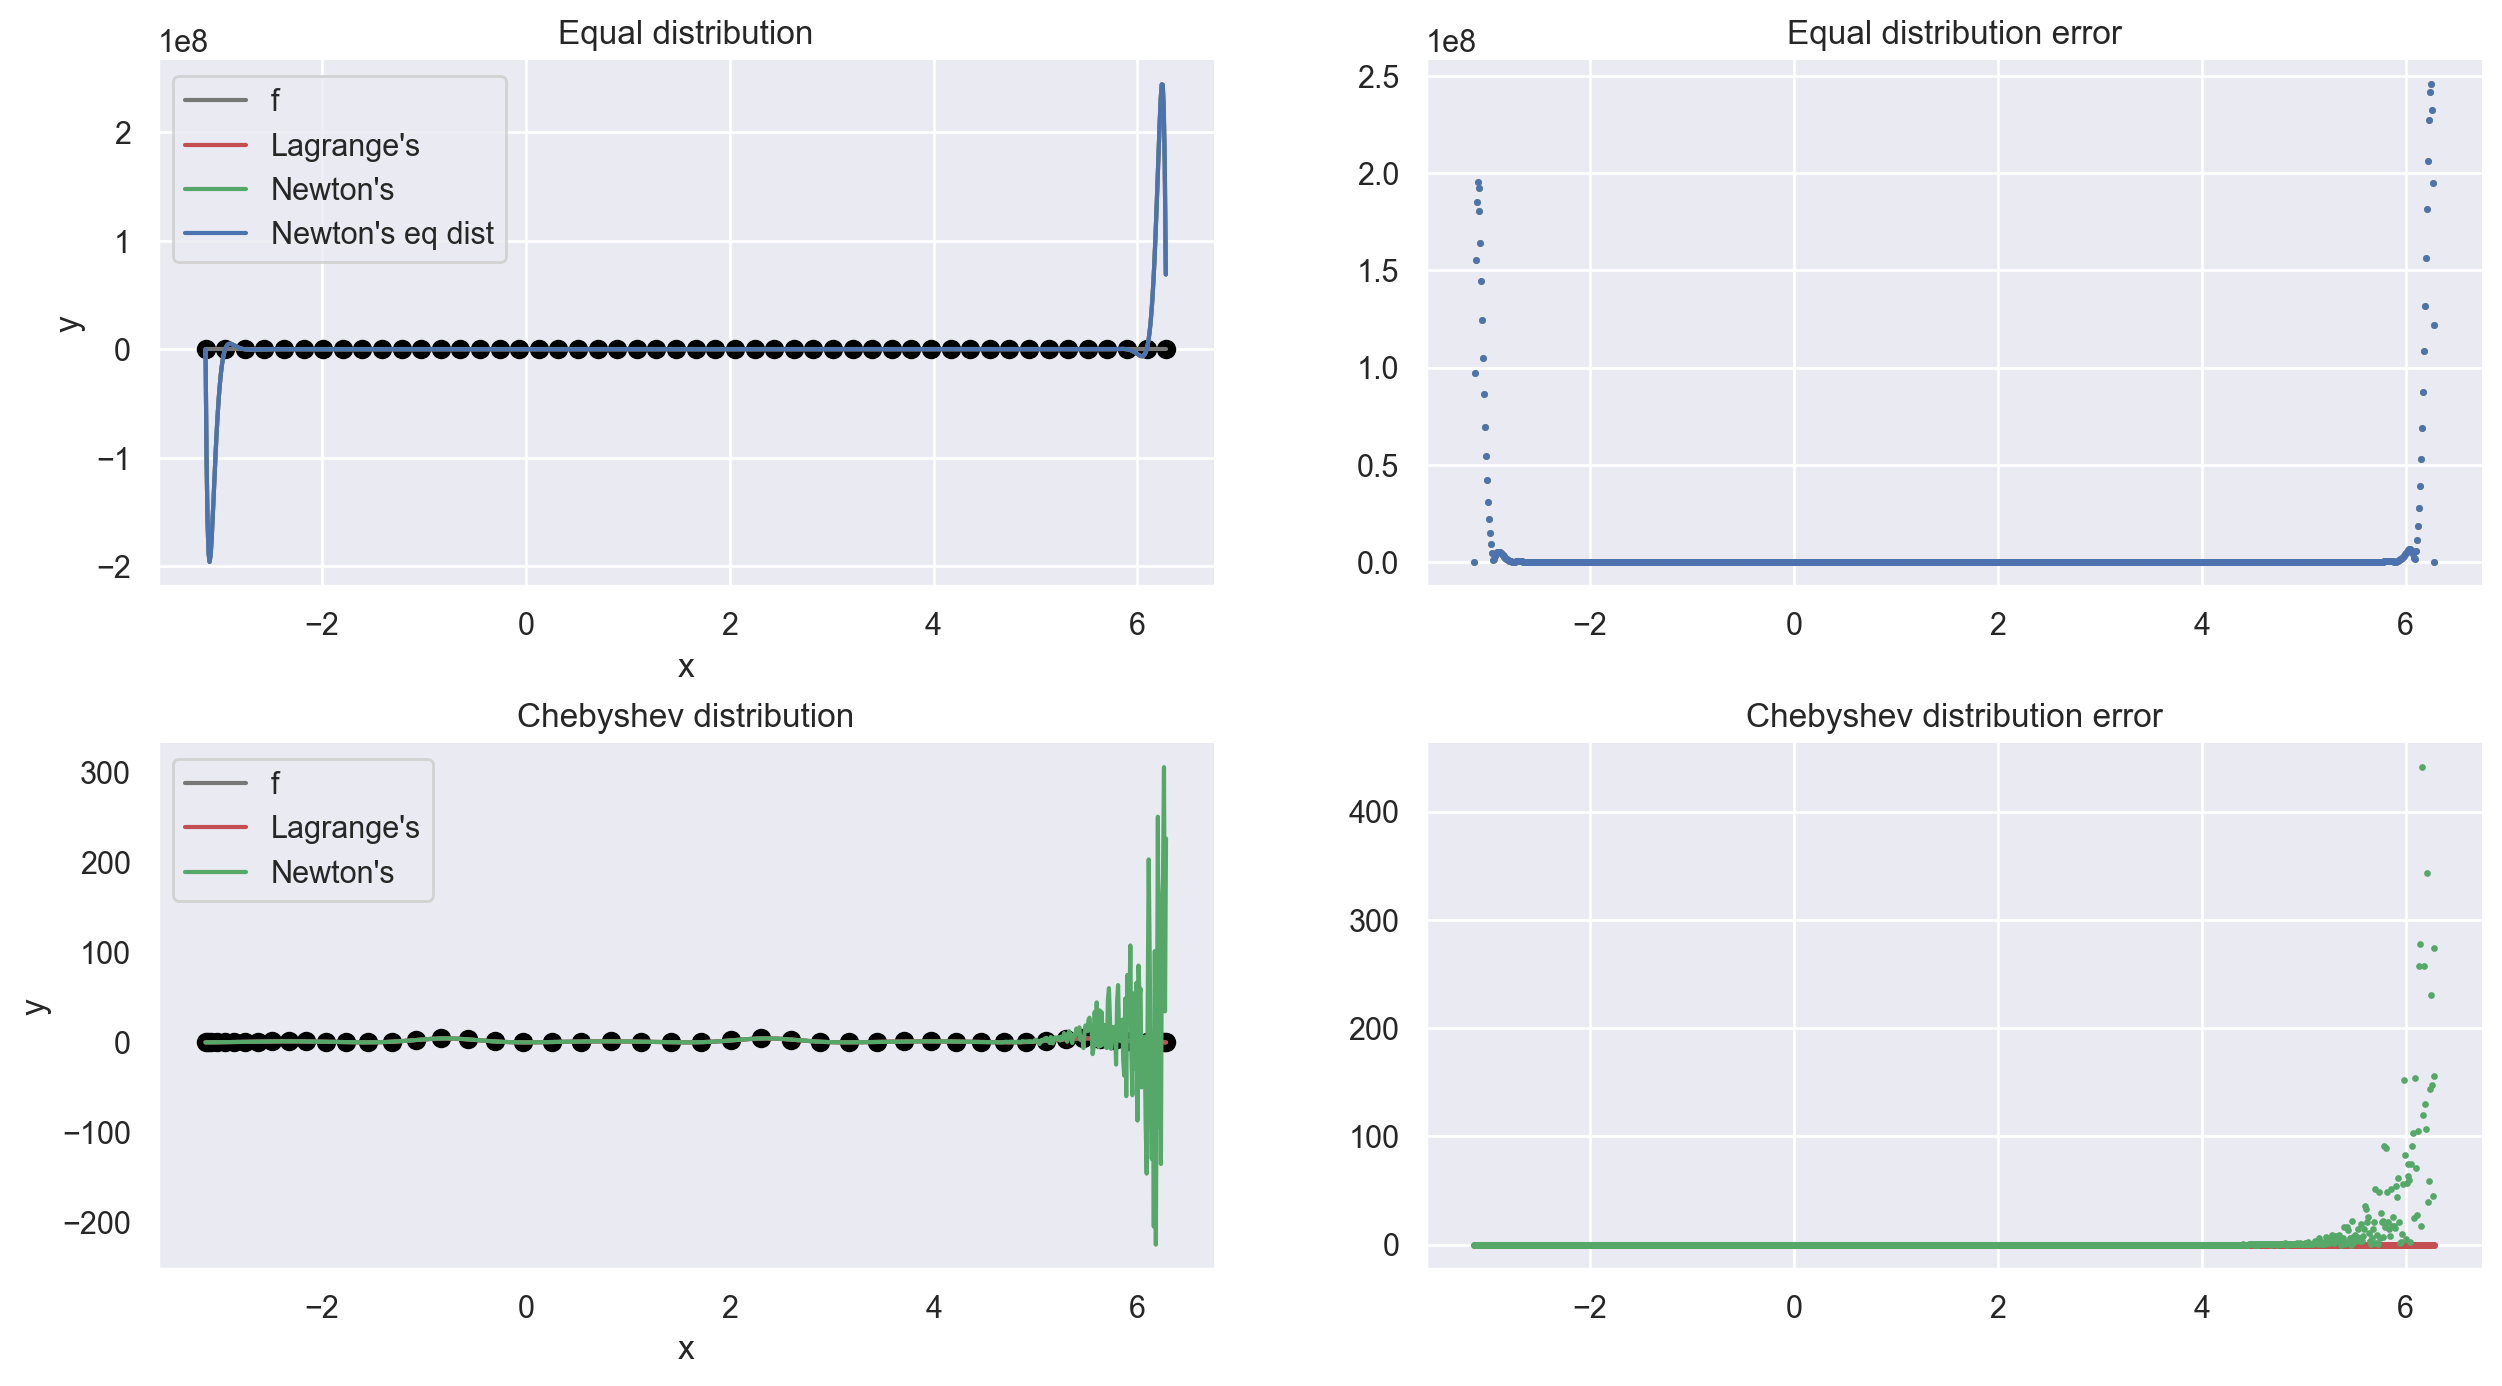

In [71]:
compare_interpolation(g, a, b, 50)

### Wielomian najlepiej przybliżający funkcję

Jako kryterium, według którego badam dokładność przybliżenia, wybrałem sumę kwadratów różnic między wartościami funkcji interpolowanej a wartościami wielomianu interpolującego: $\sum\limits_{i = 1}^{N} (f(x_i) - W(x_i))^2$.

#### Pomocnicze funkcje

In [24]:
def find_best_polynomial(f, a, b, max_n=50, *, N=1000, 
                         criterion=sum_sq_diff, 
                         nodes_gen_fn=np.linspace, 
                         options=('l', 'n', 'n_eq')):
    range_ = range(2, max_n + 1)
    headers = [[v] for v in range_]
    best_polys = {}
    
    for n in range_:
        xs_eq = nodes_gen_fn(a, b, n)
        ys_eq = [f(x) for x in xs_eq]
        Ws, labels = interpolate(xs_eq, ys_eq, options=options)
        curr_errors = calc_curr_errors(f, Ws, labels, n, a, b, N, criterion)
        update_best_polys(best_polys, curr_errors)
        
    return best_polys
            
def calc_curr_errors(f, Ws, labels, n, a, b, N, criterion):
    res = {}
    xs = np.linspace(a, b, N)
    
    for W, label in zip(Ws, labels):
        res[label] = {
            'err': criterion(f, W, xs),
            'W': W,
            'n': n
        }
            
    return res

def update_best_polys(best, errors):
    for k, v in errors.items():
        if k not in best or best[k]['err'] > errors[k]['err']:
            best[k] = v

#### Wyznaczanie najlepiej przybliżającego wielomianu

Ponieważ dla punktów równomiernie rozłożonych, dokładność przybliżenia maleje wraz ze wzrostem liczby węzłów (co obrazuje poniższy przykład, w którym widzimy, że najdokładniejsze przybliżenie otrzymujemy dla 2 węzłów), zdecydowałem się na wyznaczanie najlepiej przybliżającego funkcję wielomianu interpolującego, korzystając z węzłów Czebyszewa. W związku z tym, w dalszych rozważaniach będę korzystał jedynie z pierwszego sposobu wyznaczania wielomianu interpolującego, zgodnie z metodą Newtona (pomijam sposób dla węzłów równomiernie rozmieszczonych).

In [25]:
print(*((k, v['n'], v['err']) for k, v in \
        find_best_polynomial(g, a, b, max_n=25, nodes_gen_fn=np.linspace).items()), sep='\n')

("Lagrange's", 2, 3376.8237249859662)
("Newton's", 2, 3376.8237249859662)
("Newton's eq dist", 2, 3376.8237249859662)


Badając wszystkie wielomiany dla liczby węzłów od $2$ do $100$, możemy zauważyć, że w przypadku interpolacji z wykorzystaniem metody Newtona, największą dokładność przybliżenia otrzymujemy dla wielomianu stopnia $41$., co się pokrywa z wcześniejszymi obserwacjami wykresów, na których widać, że dla $n\ge40$, interpolacja Newtona daje dużo gorszy rezultat niż interpolacja Lagrange'a. Prawdopodobnie jest to skutkiem rosnącego błędu zaokrąglenia liczb zmiennoprzecinkowych, ponieważ do wyznaczenia kolejnego ilorazu różnicowego postaci $f[x_i,x_{i+1},...,x_{i+k}]=\Large{\frac{f[x_{i+1},x_{i+2},...,x_{i+k}]-f[x_i,x_{i+1},...,x_{i+k-1}]}{x_{i+k}-x_i}}$, musimy znać wartości poprzednich ilorazów różnicowych $f[x_{i+1},x_{i+2},...,x_{i+k}]$ oraz $f[x_i,x_{i+1},...,x_{i+k-1}]$, a poprzednie wartości także były już obarczone błędem związanym z niedokładnością zapisywania liczb zmiennoprzecinkowych w pamięci komputera.

In [26]:
res = find_best_polynomial(g, a, b, max_n=100, nodes_gen_fn=chebyshev_nodes, options=('l', 'n'))
res

{"Lagrange's": {'err': 1.0643898496931725e-12,
  'W': <function __main__.lagrange.<locals>.f(x)>,
  'n': 100},
 "Newton's": {'err': 0.4094303489618553,
  'W': <function __main__.newton.<locals>.f(x)>,
  'n': 41}}

W związku z powyższym, do znalezienia wielomianu, który najlepiej przybliża zadaną funkcję, posłużę się metodą Lagrange'a.

In [27]:
res_L = find_best_polynomial(g, a, b, max_n=500, nodes_gen_fn=chebyshev_nodes, options=('l'))

In [28]:
res_L['Lagrange\'s']['n']

186

Jak widzimy, najlepszą dokładność otrzymaliśmy dla liczby węzłów równej $n=186$ (a więc dla wielomianu $185$. stopnia). Sprawdźmy jeszcze, jaką dokładność uzyskamy dla wielomianów wyższych stopni.

**Dokładność dla $n=186$**

In [29]:
n, W = res_L['Lagrange\'s']['n'], res_L['Lagrange\'s']['W']
sum_sq_diff(g, W, np.linspace(a, b, 1000))

4.06921750680001e-27

**Dokładność dla $n=300$**

In [30]:
n = 300
xs = chebyshev_nodes(a, b, n)
ys = [g(x) for x in xs]
W = lagrange(xs, ys)
sum_sq_diff(g, W, np.linspace(a, b, 1000))

1.0052180248731316e-26

**Dokładność dla $n=500$**

In [31]:
n = 500
xs = chebyshev_nodes(a, b, n)
ys = [g(x) for x in xs]
W = lagrange(xs, ys)
sum_sq_diff(g, W, np.linspace(a, b, 1000))

2.5394503575129422e-26

Jak widzimy, dokładność przybliżenia spada wraz ze wzrostem wartości $n$ (dla $n\gt186$).

#### Wykres najlepiej przybliżającego funkcję wielomianu (Metoda Lagrange'a)

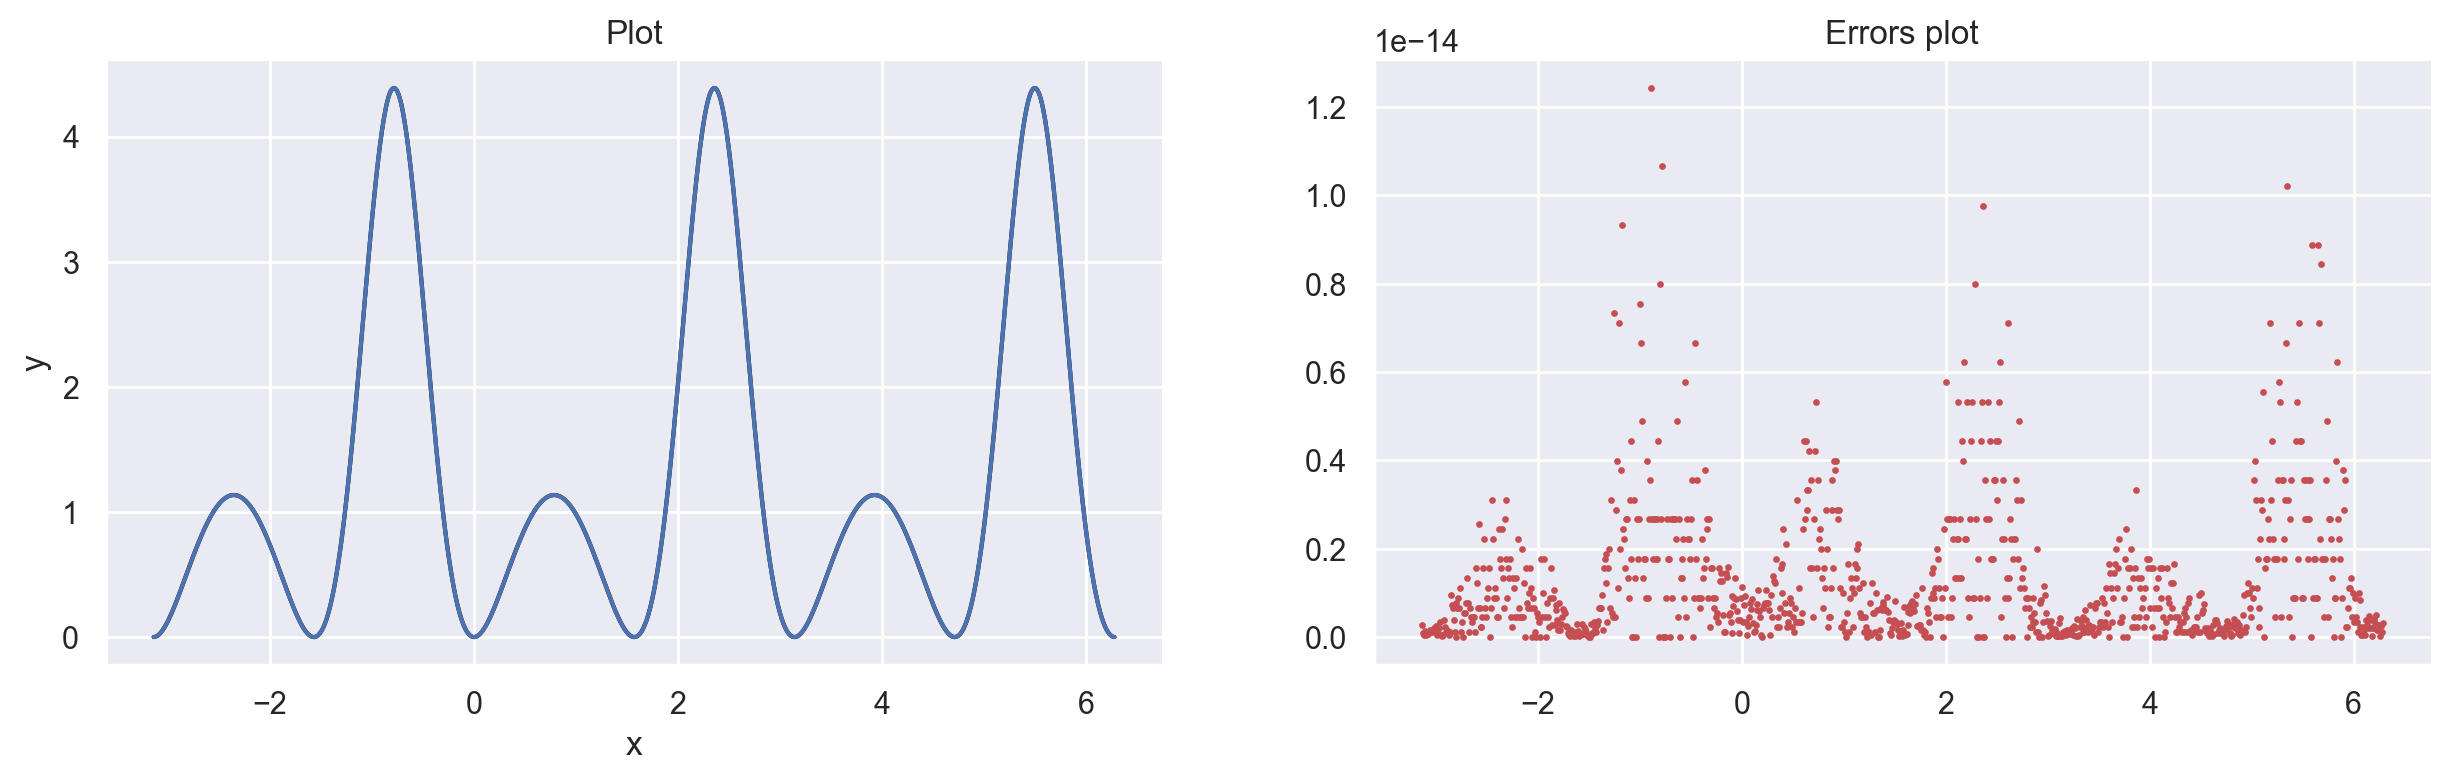

In [56]:
W = res_L['Lagrange\'s']['W']
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

plot_fn(g, a, b, step=.01, color='black', ax=ax[0])
plot_fn(W, a, b, step=.01, ax=ax[0])

N = 1000
errors_plot(ax[1], g, [W], a, b, N, 'Errors plot', 'r')

Jak możemy zauważyć, największy błąd jest rzędu $10^{-14}$. Co ciekawe, punkty na wykresie, przedstawiającym niedokładność przybliżenia interpolowanej funkcji przez wielomian interpolujący, nie leżą na jednej krzywej. Możemy zatem dojść do wniosku, że błąd w głównej mierze jest skutkiem niedokładności obliczeń na liczbach zmiennoprzecinkowych, a nie niedokładnością wielomianu przybliżającego.

#### Wykres najlepiej przybliżającego funkcję wielomianu dla metody Newtona

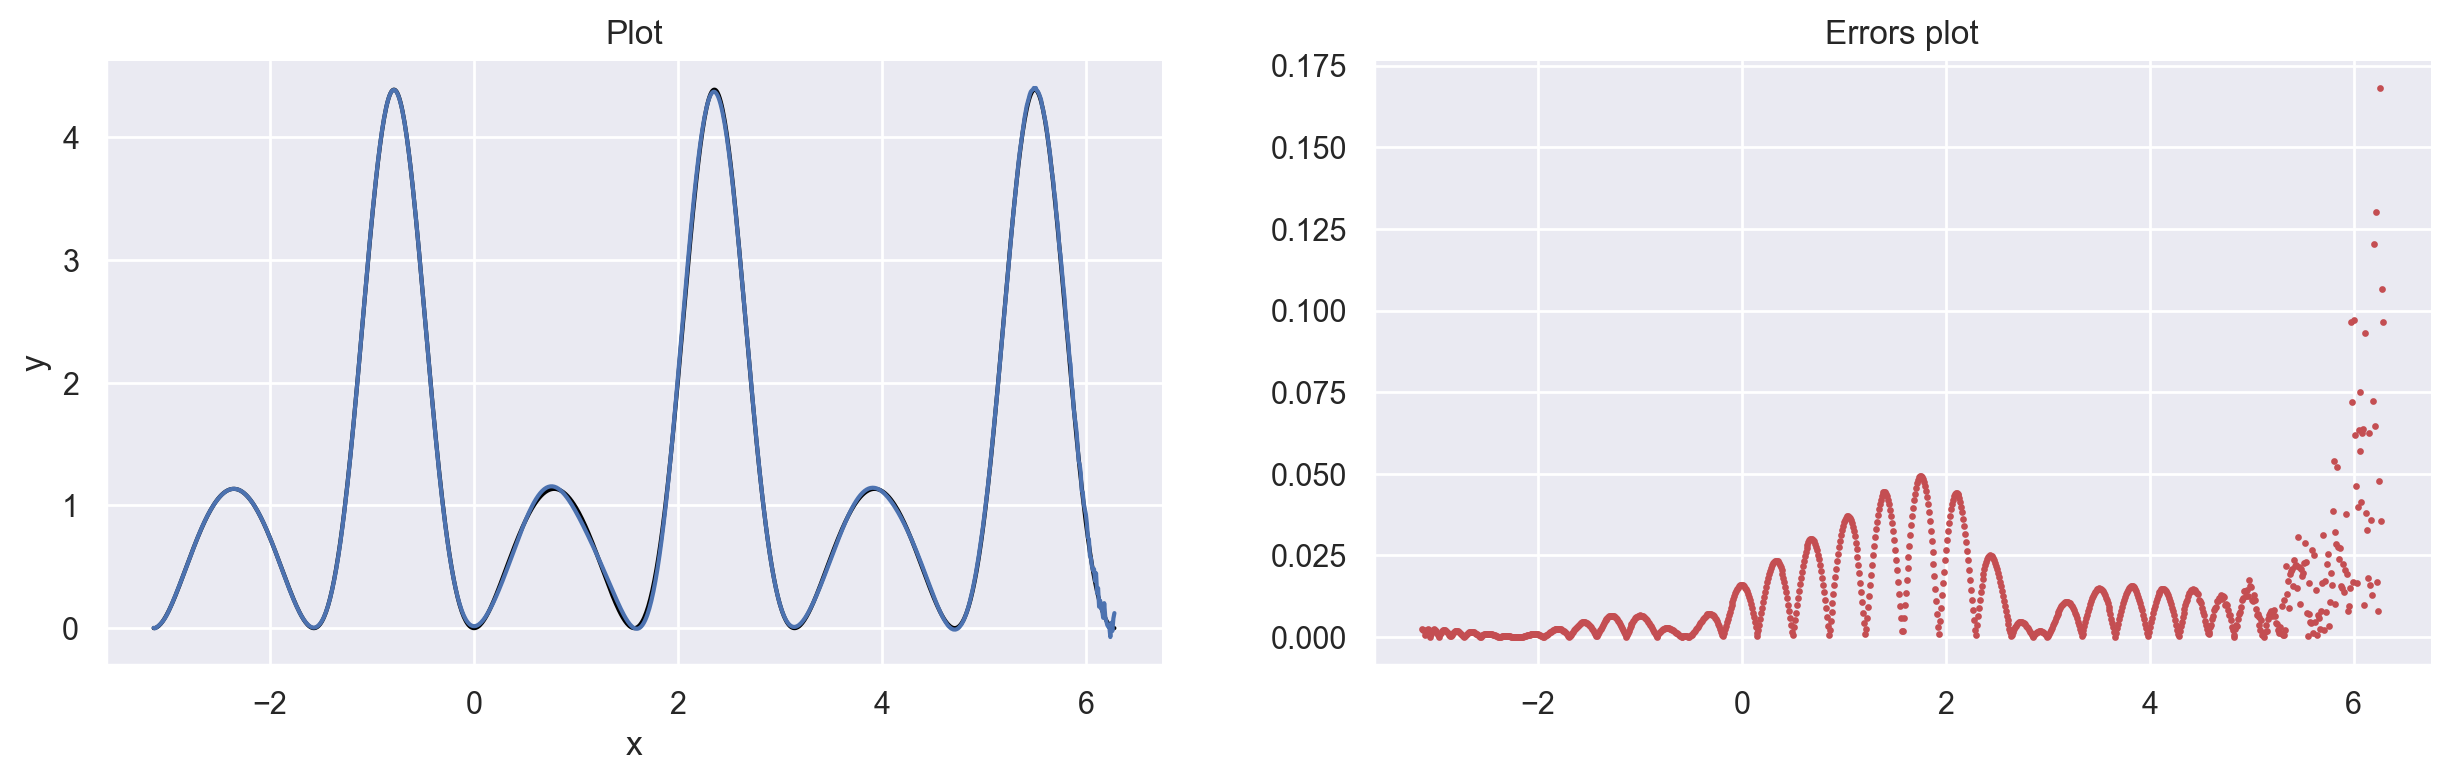

In [59]:
n = 41
xs = chebyshev_nodes(a, b, n)
ys = [g(x) for x in xs]
W = newton(xs, ys)

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

plot_fn(g, a, b, step=.01, color='black', ax=ax[0])
plot_fn(W, a, b, step=.01, ax=ax[0])

N = 1000
errors_plot(ax[1], g, [W], a, b, N, 'Errors plot', 'r')

# Wnioski

- Przeprowadzona analiza wykazała, że w przypadku równomiernego rozmieszczenia węzłów, bardzo trudno jest otrzymać wielomian interpolujący, będący dobrym przybliżeniem interpolowanej funkcji,
- Zaobserwowaliśmy również, że, w celu zmniejszenia efektu Runge'go, polegającego na znaczącym pogorszeniu przybliżenia interpolowanej funkcji na krańcach przedziału, warto zastosować rozmieszczenie węzłów interpolacyjnych, zgodne z zerami wielomianu Czebyszewa,
- Nie jesteśmy w stanie uzyskać idealnego przybliżenia interpolowanej funkcji, ponieważ musimy wziąć pod uwagę niedokładność obliczeń wykonywanych z wykorzystaniem liczb zmiennoprzecinkowych, które są obarczone błędem zaokrąglenia. Wzrostowi stopnia wielomianu interpolującego, towarzyszy wzrost dokładności przybliżenia interpolowanej funkcji, ale tylko gdy korzystamy z węzłów rozmieszczonych zgodnie z zerami wielomianu Czebyszewa. Taki wzrost dokładności jest jednak widoczny do pewnego momentu, po którym dokładność się pogarsza, ze względu na niedokładność obliczeń, wykonywanych przy pomocy liczb zmiennoprzecinkowych.